# 1. Gompertz Model

In [1]:
import pandas as pd
base_path = ""
gcycles_path = base_path+"gompertz-parameters-per-cycle/"
df_hust_gompertz = pd.read_csv("hust_gompertz_params.csv")

df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,10-4.csv,0.966029,-4.116644,-16.335186,1811,0.165353,0.965353,0.965353
1,10-6.csv,1.001915,-3.599475,-11.307331,2285,0.186145,0.986145,0.986145
2,9-5.csv,0.981464,-3.618465,-11.454369,2168,0.166389,0.966389,0.966389
3,8-5.csv,0.944335,-4.248935,-22.640850,1348,0.137523,0.937523,0.937523
4,8-4.csv,0.951492,-4.194246,-15.876141,1885,0.146758,0.946758,0.946758


In [2]:
df_hust_gompertz[df_hust_gompertz['file']=='2-3.csv']

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
26,2-3.csv,0.966837,-3.957171,-16.188589,1751,0.163437,0.963437,0.963437


In [3]:
df_eg = pd.read_csv(gcycles_path+'2-3-hust_gompertz_params.csv')

df_eg.iloc[::100].head(20)

,Cycle number,k,a,b,rul,max_SoC_above_80,SoH,gompertz-value,gompertz-1st-derivative-value,gompertz-2nd-derivative-value
0,1,1.616522,-0.658601,1.000166,1751,30.795199,0.963437,1.046919e+00,0.454884,-0.257313
100,101,1.677531,-0.559649,1.074348,1651,30.795199,0.949218,1.039549e+00,0.534447,-0.299415
200,201,1.313708,-1.132289,-1.228506,1551,30.795199,0.941313,8.895036e-01,-0.426117,-0.319356
300,301,0.954775,-5.581222,-59.255045,1451,30.795199,0.935665,1.288537e-09,-0.000002,0.001795
400,401,0.966857,-4.167661,-24.672329,1351,30.795199,0.928994,6.263621e-01,-6.708843,-93.665670
500,501,0.999018,-3.047252,-10.509887,1251,30.795199,0.922697,8.370846e-01,-1.555848,-13.460008
600,601,1.059828,-2.242975,-5.282235,1151,30.795199,0.917238,8.721026e-01,-0.898087,-3.819060
700,701,1.097764,-1.957800,-4.094945,1051,30.795199,0.909291,8.835392e-01,-0.785459,-2.518143
800,801,1.073731,-2.127316,-4.750422,951,30.795199,0.901041,8.904167e-01,-0.791850,-3.057427
900,901,1.042271,-2.411027,-6.023780,851,30.795199,0.891861,8.972635e-01,-0.809698,-4.146763


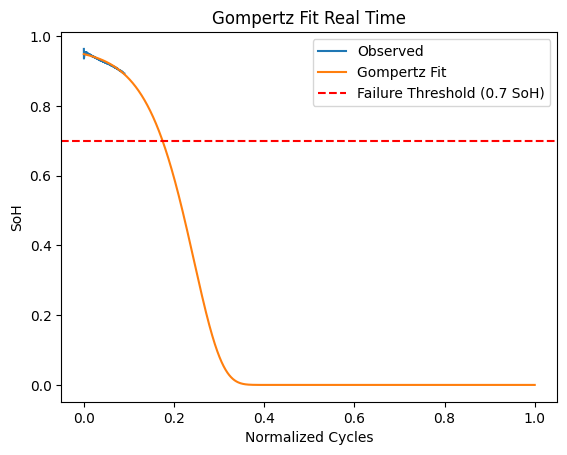

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

threshold = 900

#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))


x_data = np.array(df_eg['Cycle number'][:threshold].to_list())/10000.0
y_data = np.array(df_eg['SoH'][:threshold].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.966837,-3.957171,-16.188589]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
# plt.legend()
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Gompertz Fit Real Time")
plt.grid(False)
plt.legend()
plt.show()

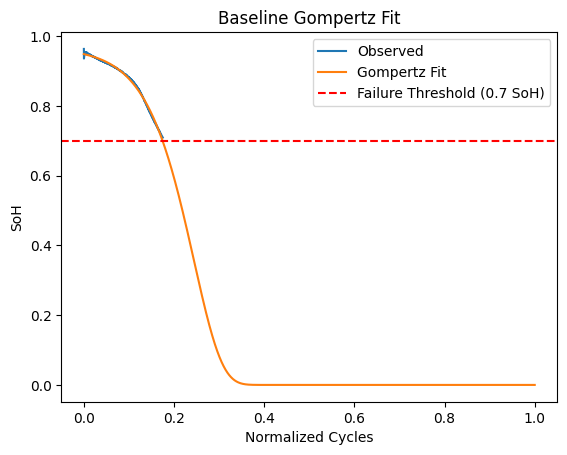

In [5]:
x_data = np.array(df_eg['Cycle number'].to_list())/10000.0
y_data = np.array(df_eg['SoH'].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.966837,-3.957171,-16.188589]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Baseline Gompertz Fit")
plt.grid(False)
plt.legend()
plt.show()

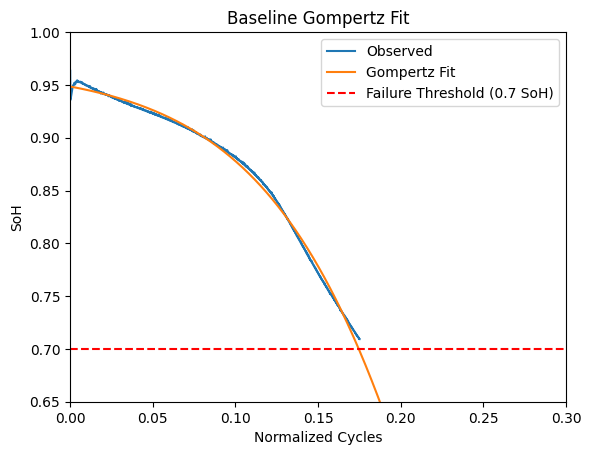

In [6]:
x_data = np.array(df_eg['Cycle number'].to_list())/10000.0
y_data = np.array(df_eg['SoH'].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.966837,-3.957171,-16.188589]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Baseline Gompertz Fit")
plt.ylim(0.65,1)
plt.xlim(0,0.3)
plt.grid(False)
plt.legend()
plt.show()

In [7]:
def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

print(f"Estimated RUL (cycle count to reach 70% SoH): {inverse_gompertz_func(0.7,*popt)*10000:.2f} cycles")

Estimated RUL (cycle count to reach 70% SoH): 1746.24 cycles


In [8]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error([1746], [1751])
rmse

5.0

## 1. a hust target values

In [9]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,10-4.csv,0.966029,-4.116644,-16.335186,1811,0.165353,0.965353,0.965353
1,10-6.csv,1.001915,-3.599475,-11.307331,2285,0.186145,0.986145,0.986145
2,9-5.csv,0.981464,-3.618465,-11.454369,2168,0.166389,0.966389,0.966389
3,8-5.csv,0.944335,-4.248935,-22.640850,1348,0.137523,0.937523,0.937523
4,8-4.csv,0.951492,-4.194246,-15.876141,1885,0.146758,0.946758,0.946758


In [10]:
list_of_pred_rul = [] #store predicted rul in a list
list_of_rmse = [] #store rmses
print('File : k   a   b   RUL   PRED_RUL     RMSE')
for i, row in df_hust_gompertz.iterrows():
    file,k,a,b,rul = row['file'],row['k'],row['a'],row['b'],row['rul']
    pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
    list_of_pred_rul.append(pred_rul)
    rmse = root_mean_squared_error([rul], [pred_rul])
    
    list_of_rmse.append(rmse)
    print(file,' : ',k,a,b, rul,pred_rul,rmse)

df_hust_gompertz['gompertz_predicted_rul'] = list_of_pred_rul
df_hust_gompertz['predicted_rul_rmse'] = list_of_rmse

File : k   a   b   RUL   PRED_RUL     RMSE
10-4.csv  :  0.9660292206090124 -4.116644018360366 -16.335185691602785 1811 1826.6051778529343 15.605177852934276
10-6.csv  :  1.0019154296635333 -3.599475413288634 -11.307331305059389 2285 2276.3070012833623 8.692998716637703
9-5.csv  :  0.981464151043511 -3.618464696472205 -11.454368620198496 2168 2211.952744888143 43.952744888143116
8-5.csv  :  0.9443346423887152 -4.248935278939007 -22.6408503927126 1348 1344.0137165253186 3.986283474681386
8-4.csv  :  0.9514917615371856 -4.194246054160375 -15.87614099919125 1885 1897.928408262152 12.928408262152061
4-1.csv  :  0.9748219144504556 -3.372628308385728 -9.707455519054928 2217 2335.852431552869 118.8524315528689
5-3.csv  :  0.9844118914582962 -3.3709065752692604 -8.364139116718416 2689 2743.7711757192583 54.77117571925828
4-6.csv  :  0.9556436359189496 -3.6759504568302033 -17.921463208477554 1380 1399.979154190412 19.97915419041192
9-2.csv  :  0.9868160438257112 -3.552350965523672 -11.4554381726

In [11]:
df_hust_gompertz['predicted_rul_rmse'].mean(),df_hust_gompertz['predicted_rul_rmse'].median(),df_hust_gompertz['rul'].mean()

(27.904524098022396, 19.42275428058724, 1897.6883116883116)

In [12]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH,gompertz_predicted_rul,predicted_rul_rmse
0,10-4.csv,0.966029,-4.116644,-16.335186,1811,0.165353,0.965353,0.965353,1826.605178,15.605178
1,10-6.csv,1.001915,-3.599475,-11.307331,2285,0.186145,0.986145,0.986145,2276.307001,8.692999
2,9-5.csv,0.981464,-3.618465,-11.454369,2168,0.166389,0.966389,0.966389,2211.952745,43.952745
3,8-5.csv,0.944335,-4.248935,-22.640850,1348,0.137523,0.937523,0.937523,1344.013717,3.986283
4,8-4.csv,0.951492,-4.194246,-15.876141,1885,0.146758,0.946758,0.946758,1897.928408,12.928408


In [13]:
root_mean_squared_error(df_hust_gompertz['rul'].to_list(),df_hust_gompertz['gompertz_predicted_rul'].to_list())

38.338871395900966

In [14]:
# 1. Calculate your standard RMSE 
rmse = root_mean_squared_error(df_hust_gompertz['rul'], df_hust_gompertz['gompertz_predicted_rul'])

# 2. Calculate the mean of the actual RUL
mean_rul = df_hust_gompertz['rul'].mean()

# 3. Calculate RMSE as a percentage (NRMSE)
nrmse_percent = (rmse / mean_rul) * 100

print(f"RMSE: {rmse}")
print(f"RMSE as % of Mean RUL: {nrmse_percent:.2f}%")

RMSE: 38.338871395900966
RMSE as % of Mean RUL: 2.02%


In [15]:
print(f'Proof of concept rmse : {df_hust_gompertz['predicted_rul_rmse'].mean():.2f} %rmse : {df_hust_gompertz['predicted_rul_rmse'].mean()*100/df_hust_gompertz['rul'].mean():.2f} %')

Proof of concept rmse : 27.90 %rmse : 1.47 %


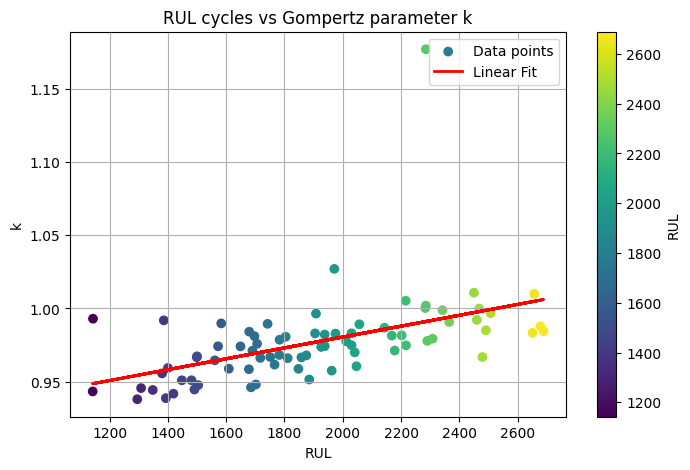

In [16]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['k']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('k')
plt.title('RUL cycles vs Gompertz parameter k')
plt.legend()
plt.grid(True)
plt.show()

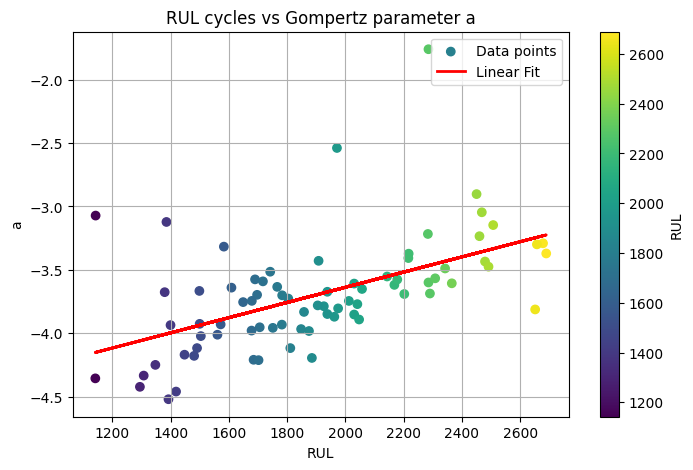

In [17]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['a']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('a')
plt.title('RUL cycles vs Gompertz parameter a')
plt.legend()
plt.grid(True)
plt.show()

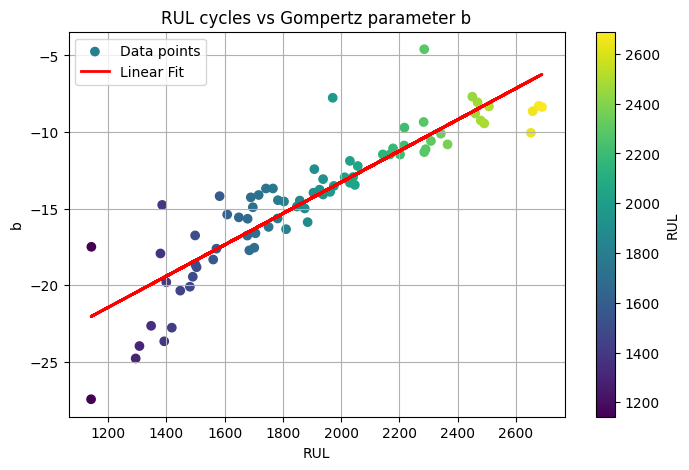

In [18]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['b']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('b')
plt.title('RUL cycles vs Gompertz parameter b')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    # plt.xticks(x, battery_ids)
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def multi_battery_scatter_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # Numeric x positions for scatter plot

    plt.figure(figsize=(12, 6))
    plt.scatter(x, true_ruls, color='blue', label='True RUL', marker='o')
    plt.scatter(x, pred_ruls, color='orange', label='Predicted RUL', marker='x')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

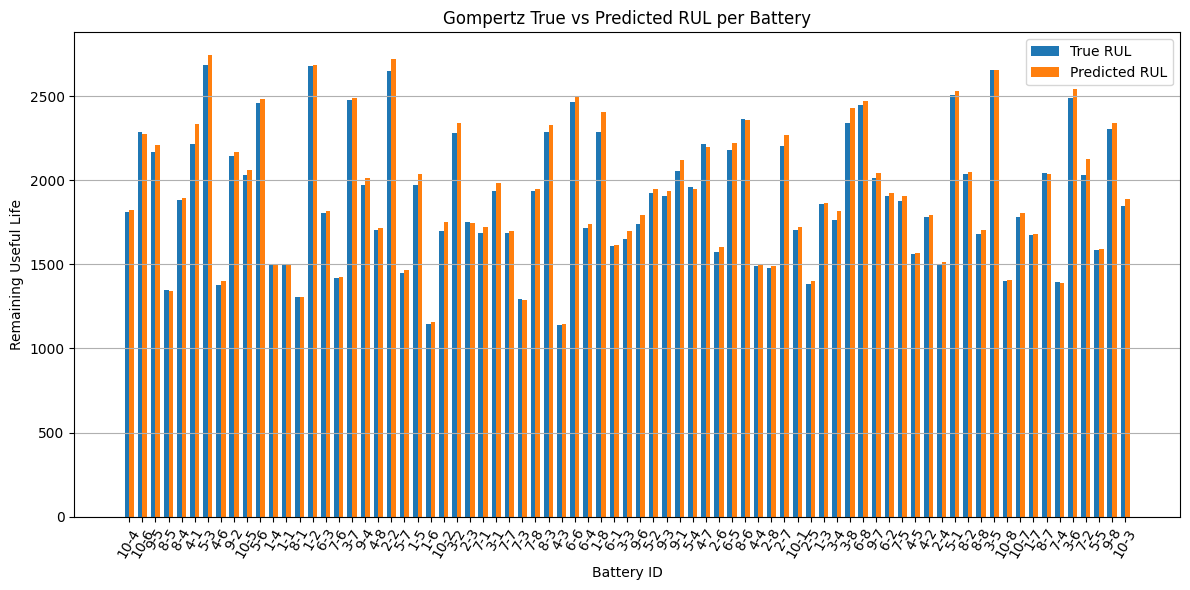

In [21]:
multi_battery_bar_plot(battery_data_dict)

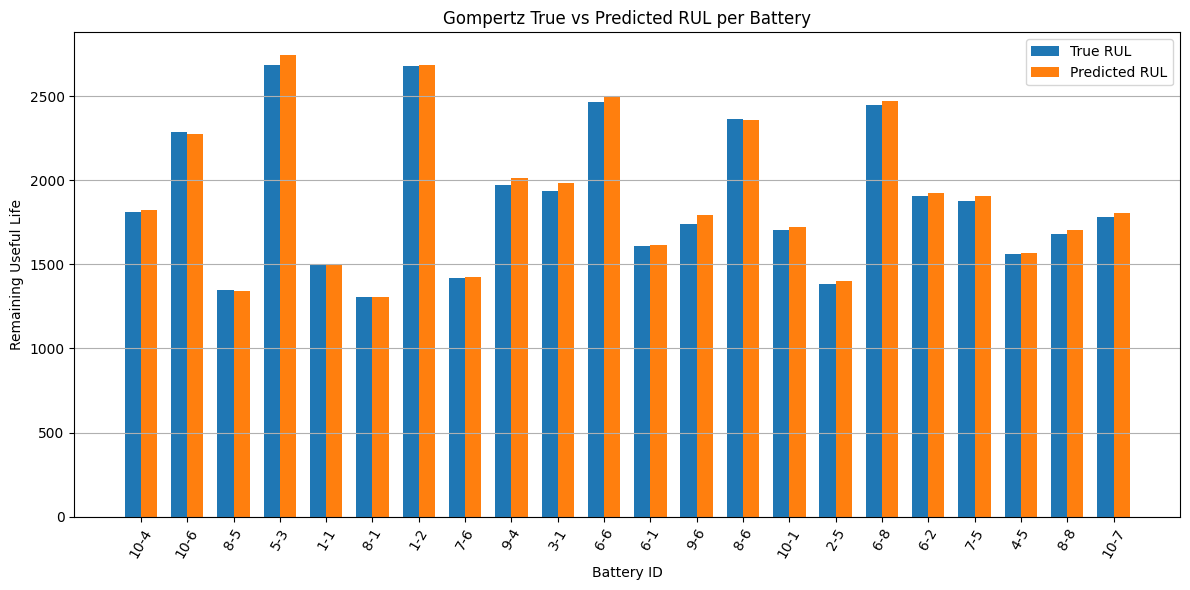

In [22]:
# test = ['7-6.csv','10-5.csv','7-7.csv','7-4.csv','4-7.csv','2-6.csv','10-2.csv','1-6.csv','8-4.csv','2-5.csv','1-1.csv','2-2.csv'] #My initial test csvs

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [
    '1-1',  '1-2',  '2-5',  '3-1',  '4-5',  '5-3',  '6-1',  '6-2',
    '6-6',  '6-8',  '7-5',  '7-6',  '8-1',  '8-5',  '8-6',  '8-8',
    '9-4',  '9-6',  '10-1', '10-4', '10-6', '10-7']

test = [i+'.csv' for i in test_ids] #similar to BatteryML HUST test cells 

battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    if row['file'] in test:
        battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

multi_battery_bar_plot(battery_data_dict)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    # Compute losses
    mse = mean_squared_error(true_ruls, pred_ruls)
    mae = mean_absolute_error(true_ruls, pred_ruls)
    
    # For Huber Loss, need tensors
    y_true_tensor = torch.tensor(true_ruls, dtype=torch.float32)
    y_pred_tensor = torch.tensor(pred_ruls, dtype=torch.float32)
    huber_loss_fn = nn.SmoothL1Loss()
    huber = huber_loss_fn(y_pred_tensor, y_true_tensor).item()

    # Print losses
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Huber Loss: {huber:.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

    # Plot
    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    return mse,mae,huber,np.sqrt(mse)

Mean Squared Error (MSE): 642.0155
Mean Absolute Error (MAE): 19.7571
Huber Loss: 19.2573
Root Mean Squared Error (RMSE): 25.3380


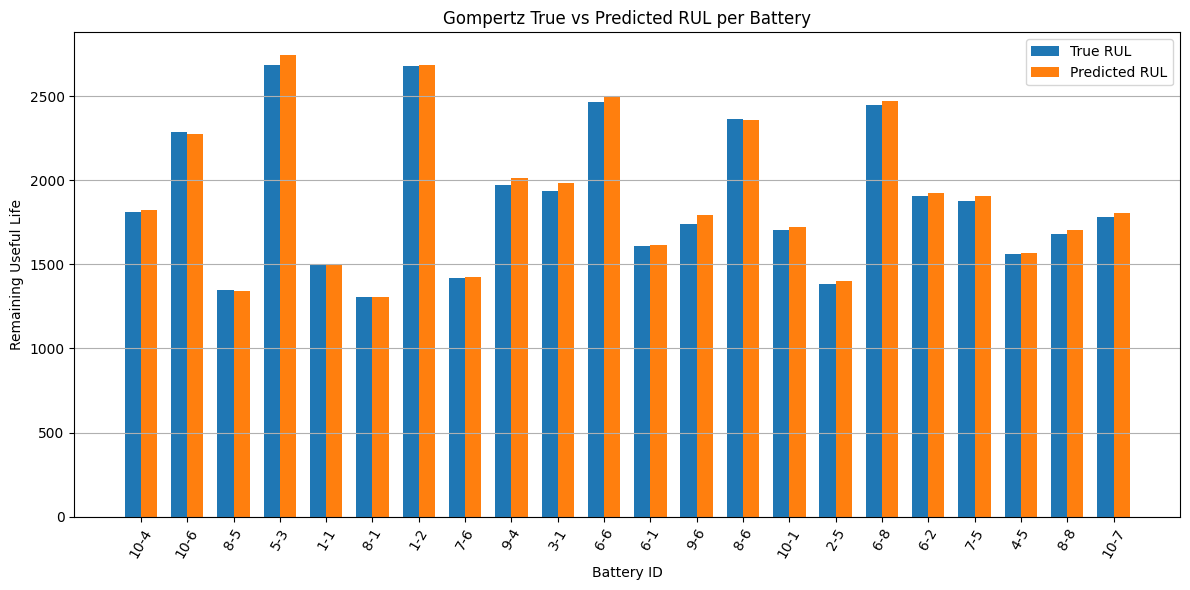

(642.015464452155, 19.757089260914405, 19.257299423217773, 25.338024083423612)

In [24]:
multi_battery_bar_plot(battery_data_dict)

## 1. b per cycle error calculation

In [25]:
import re
import os

files = os.listdir(base_path+"csv-summary/")
#Filter out non-csv files, folders or csv that don't start with a digit

filtered = [f for f in files if re.match(r'^\d', f) and f.endswith('.csv')]

print(len(filtered))

pairs = [re.match(r'^(\d+-\d+)', f).group(1) for f in filtered]

print(pairs)

77
['10-4', '10-6', '9-5', '8-5', '8-4', '4-1', '5-3', '4-6', '9-2', '10-5', '5-6', '1-4', '1-1', '8-1', '1-2', '6-3', '7-6', '3-7', '9-4', '4-8', '2-2', '5-7', '1-5', '1-6', '10-2', '3-2', '2-3', '7-1', '3-1', '7-7', '7-3', '7-8', '8-3', '4-3', '6-6', '6-4', '1-8', '6-1', '3-3', '9-6', '5-2', '9-3', '9-1', '5-4', '4-7', '2-6', '6-5', '8-6', '4-4', '2-8', '2-7', '10-1', '2-5', '1-3', '3-4', '3-8', '6-8', '9-7', '6-2', '7-5', '4-5', '4-2', '2-4', '5-1', '8-2', '8-8', '3-5', '10-8', '10-7', '1-7', '8-7', '7-4', '3-6', '7-2', '5-5', '9-8', '10-3']


In [26]:
cycle_lengths = []
cycle_lengths_sort = {}
#Correlation of k, a and b with cycle number
##Place k, a and b of all cells in all cycles in one dataframe
for choice in pairs:
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    cycle_lengths.append(gompertz_df_full.shape[0])
    cycle_lengths_sort[choice] = gompertz_df_full.shape[0]
print(f"Max : {max(cycle_lengths)}, Min : {min(cycle_lengths)}")


#sort pairs by RUL
pairs = sorted(cycle_lengths_sort, key=cycle_lengths_sort.get)
print(pairs)

Max : 2689, Min : 1142
['4-3', '1-6', '7-3', '8-1', '8-5', '4-6', '2-5', '7-4', '10-8', '7-6', '5-7', '2-8', '4-4', '2-4', '1-4', '1-1', '4-5', '2-6', '5-5', '6-1', '3-3', '1-7', '8-8', '7-7', '7-1', '10-2', '10-1', '4-8', '6-4', '9-6', '2-3', '3-4', '4-2', '10-7', '6-3', '10-4', '10-3', '1-3', '7-5', '8-4', '9-3', '6-2', '5-2', '3-1', '7-8', '5-4', '1-5', '9-4', '9-7', '10-5', '7-2', '8-2', '8-7', '9-1', '9-2', '9-5', '6-5', '2-7', '4-7', '4-1', '3-2', '10-6', '1-8', '8-3', '9-8', '3-8', '8-6', '6-8', '5-6', '6-6', '3-7', '3-6', '5-1', '2-2', '3-5', '1-2', '5-3']


In [27]:
# Consolidate k,a,b data per cycle
unified_gompertz = {}
for choice in pairs:
    #get file
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    #add cell name
    gompertz_df_full['cell_name'] = choice
    for i in range(1,max(cycle_lengths)+1,1):
        try:
            temp_data = gompertz_df_full[gompertz_df_full["Cycle number"]==i].iloc[0].to_dict()
        except:
            temp_data = {'Cycle number': i, 'k': None, 'a': None,'b': None, 'rul': None, 'max_SoC_above_80': None,'SoH': None, 'cell_name': choice}
        try:
            unified_gompertz[i].append(temp_data)
        except:
            unified_gompertz[i] = []
            unified_gompertz[i].append(temp_data)

In [28]:
unified_gompertz.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [29]:
import pickle
#help(pickle)
#save consolidated gompertz per cycle as a pickle file

with open('unified_gompertz.pkl', 'wb') as file:
    pickle.dump(unified_gompertz, file)

In [30]:
unified_gompertz[1143]

[{'Cycle number': 1143,
  'k': None,
  'a': None,
  'b': None,
  'rul': None,
  'max_SoC_above_80': None,
  'SoH': None,
  'cell_name': '4-3'},
 {'Cycle number': 1143,
  'k': 0.9929696410134204,
  'a': -3.0722670186800976,
  'b': -17.48642431981666,
  'rul': 1,
  'max_SoC_above_80': 30.53435391414142,
  'SoH': 0.7081841040843205,
  'gompertz-value': 0.9479511705890352,
  'gompertz-1st-derivative-value': -0.7690911119655145,
  'gompertz-2nd-derivative-value': -12.82467503602524,
  'cell_name': '1-6'},
 {'Cycle number': 1143,
  'k': 0.9362102802506004,
  'a': -4.525392079571028,
  'b': -25.68439420313864,
  'rul': 153,
  'max_SoC_above_80': 27.18392499999986,
  'SoH': 0.7621633618796625,
  'gompertz-value': 0.9213095832428816,
  'gompertz-1st-derivative-value': -0.3796534442085617,
  'gompertz-2nd-derivative-value': -9.594721051575124,
  'cell_name': '7-3'},
 {'Cycle number': 1143,
  'k': 0.9424634527766476,
  'a': -4.509572118006852,
  'b': -25.534641415046536,
  'rul': 166,
  'max_SoC_

In [31]:
#Compute Gompertz RUL prediction per cycle
gompertz_results = {}
for i in unified_gompertz.keys():
    ruls, pred_ruls = [],[]
    for k, j in enumerate(unified_gompertz[i]):
        k,a,b,rul = j['k'],j['a'],j['b'],unified_gompertz[1][k]['rul']
        if k == None: #skip over cells that have reached rul
            continue
        else:
            pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
            #print(i,j['k'],j['a'],j['b'],j['rul'],pred_rul)
            ruls.append(rul)
            pred_ruls.append(pred_rul)
    gompertz_results[i] = {'ruls':ruls,'pred_ruls':pred_ruls}
    #break

    # 2. Calculate the mean of the actual RUL
    mean_rul = np.mean(ruls)
    
    # 3. Calculate RMSE as a percentage (NRMSE)
    nrmse_percent = (rmse / mean_rul) * 100

In [32]:
gompertz_results[1000]

{'ruls': [1142,
  1143,
  1295,
  1308,
  1348,
  1380,
  1386,
  1393,
  1400,
  1419,
  1448,
  1481,
  1491,
  1499,
  1500,
  1504,
  1561,
  1572,
  1583,
  1609,
  1649,
  1678,
  1679,
  1685,
  1690,
  1697,
  1702,
  1706,
  1717,
  1742,
  1751,
  1766,
  1782,
  1783,
  1804,
  1811,
  1848,
  1858,
  1875,
  1885,
  1905,
  1908,
  1926,
  1938,
  1938,
  1962,
  1971,
  1975,
  2012,
  2030,
  2030,
  2041,
  2047,
  2057,
  2143,
  2168,
  2178,
  2202,
  2216,
  2217,
  2283,
  2285,
  2285,
  2290,
  2308,
  2342,
  2365,
  2450,
  2460,
  2468,
  2479,
  2491,
  2507,
  2651,
  2657,
  2678,
  2689],
 'pred_ruls': [1135.8810379588742,
  1159.4544103956014,
  1303.56276686498,
  1303.1952075998595,
  1324.816293965963,
  1405.4481621458742,
  1377.738681596267,
  1426.5716264845714,
  1414.4292744536729,
  1497.4239354885751,
  1524.207216189814,
  1603.4187057707093,
  1555.0557482549082,
  1537.6368107852354,
  1827.6386505342286,
  1535.2553074527034,
  1724.30936943

In [33]:
cycle_rmse = {}
cycle_nrmse = {}
for i in gompertz_results.keys():
    cycle_rmse[i] = root_mean_squared_error(gompertz_results[i]['ruls'],gompertz_results[i]['pred_ruls'])
    cycle_nrmse[i] = (cycle_rmse[i]/np.mean(gompertz_results[i]['ruls']))*100
print(cycle_rmse)

{1: 6672.6276344377675, 2: 6565.314322092014, 3: 6516.09852008746, 4: 6489.555438153699, 5: 6470.417689844753, 6: 6455.84857631002, 7: 6443.97421903423, 8: 6388.441446151387, 9: 6379.511819077519, 10: 7223.291725966728, 11: 6365.21136507693, 12: 6359.502482539941, 13: 6369.139196091681, 14: 6249.391293824811, 15: 13554.388103697638, 16: 3848.222756653019, 17: 5840.189556802852, 18: 4448.760676762004, 19: 2316.4888755189527, 20: 2191.71739363774, 21: 2093.517297248949, 22: 2069.77732263054, 23: 2080.0080307314074, 24: 2054.2454675374815, 25: 2061.2546571014723, 26: 2079.0718629369985, 27: 2067.0529757170193, 28: 2067.01715731183, 29: 2074.7227817657517, 30: 2075.9200407724925, 31: 2061.0137516627697, 32: 2074.932800839681, 33: 2079.8800359925217, 34: 2090.660871852867, 35: 2090.999314846445, 36: 2091.3192675912273, 37: 2102.354487009119, 38: 2119.6355369217854, 39: 2124.833158340266, 40: 2139.5878390895255, 41: 2147.771423955569, 42: 2162.7049449431993, 43: 2183.3130896800726, 44: 2204.

In [34]:
print(cycle_nrmse)

{1: 351.6187349281478, 2: 345.9637856045531, 3: 343.3703248290705, 4: 341.97161874176015, 5: 340.96314183904275, 6: 340.19541231017337, 7: 339.5696848288661, 8: 336.6433468975629, 9: 336.172794013885, 10: 380.63636064346105, 11: 335.4192216852518, 12: 335.11838816576255, 13: 335.6262014611485, 14: 329.31600280896134, 15: 714.257869441096, 16: 202.7847635963664, 17: 307.75283384693586, 18: 234.43052525333235, 19: 122.06898578924417, 20: 115.494066129745, 21: 110.31934403318398, 22: 109.06834962740146, 23: 109.6074638769784, 24: 108.24988776528251, 25: 108.61924186420482, 26: 109.5581318666244, 27: 108.9247882798008, 28: 108.92290080413005, 29: 109.32895402195624, 30: 109.3920444145864, 31: 108.60654718525156, 32: 109.34002112252463, 33: 109.60071910555848, 34: 110.1688227184618, 35: 110.18665720642768, 36: 110.2035173379262, 37: 110.78502586859076, 38: 111.69566276329196, 39: 111.96955502402135, 40: 112.7470631457915, 41: 113.17830281858915, 42: 113.96523505059221, 43: 115.0511955115352

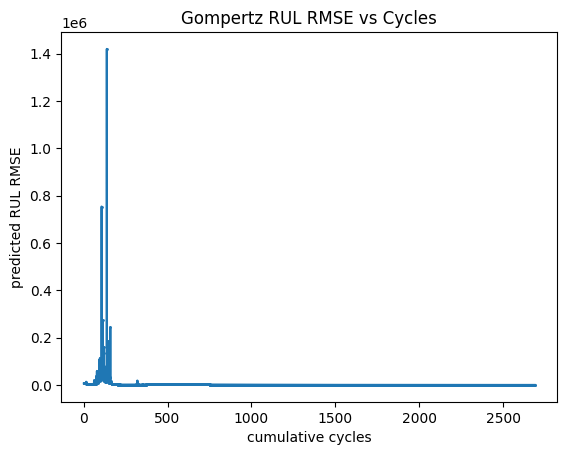

In [35]:
#Plot rmse per cycle
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.grid(False)
plt.show()

In [36]:
# help(plt.yscale)

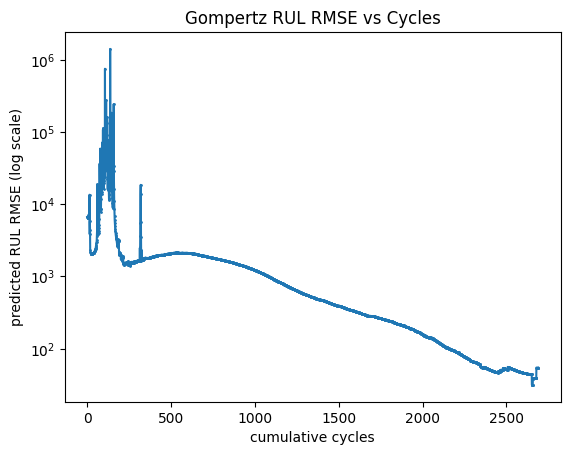

In [37]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
plt.show()

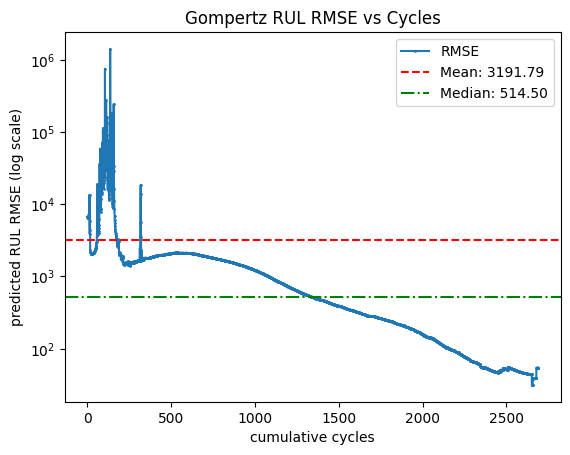

In [38]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

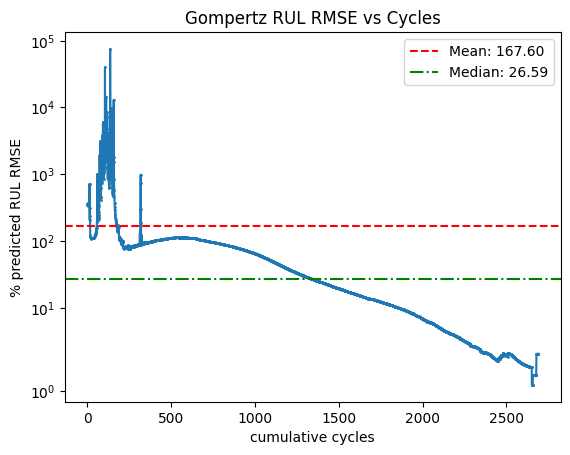

In [39]:
#Plot rmse per cycle
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('% predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

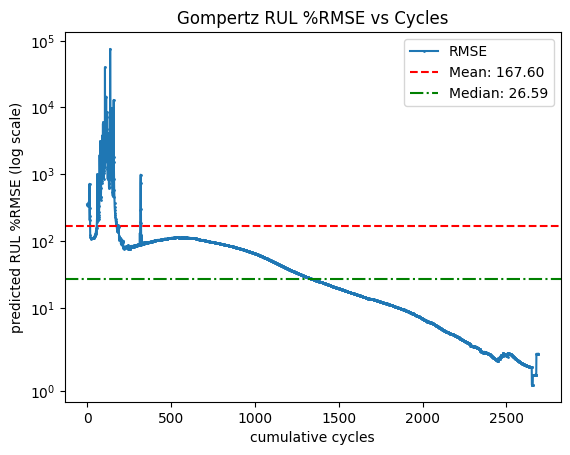

In [40]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE (log scale)')
plt.title('Gompertz RUL %RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

In [41]:
#save gompertz results
with open('gompertz_results.pkl', 'wb') as file:
    pickle.dump(gompertz_results, file)

#save gompertz rmse results
with open('gompertz_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [42]:
np.median(y),np.mean(y)

(26.593217444662383, 167.59854449432825)

# 2. NNs

In [43]:
version = '8'
MAX_WINDOW = 2689

### prepare data

In [44]:
WINDOW_SIZES = [100] #[5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100,500,1000] #[i for i in range (5,100,5)]
print("WINDOW SIZES TO TEST : ",WINDOW_SIZES,len(WINDOW_SIZES))


# Make list of CSV paths
main_files_path = 'gompertz-parameters-per-cycle/'
#/kaggle/input/generate-hust-data-gompertz-k-a-b/1-2-hust_gompertz_params.csv
csv_files = os.listdir(main_files_path)
csv_files = [f for f in csv_files if re.match(r'^\d', f) and f.endswith('-hust_gompertz_params.csv')]

#BatteryML like train-val-test split
csv_files = [f.removesuffix('-hust_gompertz_params.csv') for f in csv_files]
print(csv_files)

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [f for f in csv_files if f not in train_ids]

print(test_ids,len(test_ids))

#csv_paths = [os.path.join(main_files_path, file) for file in csv_files]
#separate according to train, val and test
train_paths = [os.path.join(main_files_path, file+'-hust_gompertz_params.csv') for file in train_ids]

testing_paths = [os.path.join(main_files_path, file+'-hust_gompertz_params.csv') for file in test_ids]

val_paths = testing_paths[:int(len(testing_paths)*0.5)]
test_paths = testing_paths[:int(len(testing_paths))]

print(len(train_paths), len(val_paths), len(test_paths))

WINDOW SIZES TO TEST :  [100] 1
['1-5', '4-5', '6-6', '3-5', '5-2', '4-7', '6-1', '8-7', '8-2', '9-7', '6-2', '1-4', '4-3', '2-2', '4-2', '5-3', '5-5', '1-8', '5-6', '4-4', '10-4', '2-8', '3-2', '2-6', '3-6', '4-1', '1-2', '8-6', '7-8', '1-6', '10-5', '7-2', '4-6', '8-4', '10-7', '3-8', '6-8', '3-7', '6-5', '3-3', '7-3', '7-5', '10-1', '7-4', '9-2', '2-4', '7-1', '10-8', '10-6', '5-1', '1-1', '9-8', '2-7', '9-4', '8-3', '10-2', '9-5', '5-4', '7-7', '10-3', '5-7', '1-3', '6-3', '3-4', '7-6', '4-8', '9-1', '8-8', '3-1', '8-1', '6-4', '1-7', '9-3', '9-6', '8-5', '2-3', '2-5']
['4-5', '6-6', '6-1', '6-2', '5-3', '10-4', '1-2', '8-6', '10-7', '6-8', '7-5', '10-1', '10-6', '1-1', '9-4', '7-6', '8-8', '3-1', '8-1', '9-6', '8-5', '2-5'] 22
55 11 22


## 2a. NNs that predict RUL from SoH

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [46]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    # X.append(list(df['SoH'])[I:window_size+I])
    
    # y.append(list(df['rul'])[:1])
    X.append(list(df['SoH'])[I:window_size+I])
    y.append(list(df['rul'])[window_size+I:1+I+window_size])
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor

def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1

In [47]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')

In [48]:
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        
        # Run LSTM
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        
        prediction = self.fc(last_time_step)
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
# model.load_state_dict(torch.load(f"/kaggle/input/gi-lstm-models/pytorch/default/{version}/SoH-to-RUL-best_lstm_model-window-100.pth",map_location=torch.device(device)))
model.load_state_dict(torch.load(f"models/SoH-to-RUL-best_lstm_model-window-100.pth",map_location=torch.device(device)))
#generate test_loader
test_rmse = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_pred = model(X_test)
    print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

print('\n RMSE for 100th cycle : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numbers had been normalized using 10000
print('\n Test %RMSE for 100th cycle by SoH to RUL prediction : ',(test_rmse/len(test_loader)*10000)/(np.mean(y_test.cpu().detach().numpy())*10000)*100)
# print(np.mean(y_test.cpu().detach().numpy())*10000)
# print(test_rmse/len(test_loader)*10000)

tensor([[0.1749],
        [0.1906],
        [0.1499],
        [0.1953],
        [0.1860],
        [0.1866],
        [0.1847],
        [0.2030],
        [0.1876],
        [0.1890],
        [0.1855],
        [0.1564],
        [0.2254],
        [0.1459],
        [0.1969],
        [0.1492],
        [0.1937],
        [0.1921],
        [0.1505],
        [0.1947],
        [0.1450],
        [0.1757]], device='cuda:0', grad_fn=<AddmmBackward0>) 
 tensor([[0.1461],
        [0.2368],
        [0.1509],
        [0.1808],
        [0.2589],
        [0.1711],
        [0.2578],
        [0.2265],
        [0.1683],
        [0.2350],
        [0.1775],
        [0.1602],
        [0.2185],
        [0.1404],
        [0.1875],
        [0.1319],
        [0.1579],
        [0.1838],
        [0.1208],
        [0.1642],
        [0.1248],
        [0.1286]])

 RMSE for 100th cycle :  326.42729580402374

 Test %RMSE for 100th cycle by SoH to RUL prediction :  18.28118971878174


In [49]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    if len(df) >= window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor

In [50]:
from tqdm import tqdm
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,MAX_WINDOW)):
    test_rmse = 0
    test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_pred = model(X_test)
        #print(y_pred,'\n',y_test)
        #inference for test results
        test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())
    
    #print(f'\n Test RMSE for cycle {I} SoH to RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numbers had been normalized using 10000
    if len(test_loader) > 0:
        cycle_rmse[I] = test_rmse/len(test_loader)*10000
        cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/((np.mean(y_test.cpu().detach().numpy())*10000)+I)*100

100%|██████████| 2589/2589 [02:37<00:00, 16.42it/s]


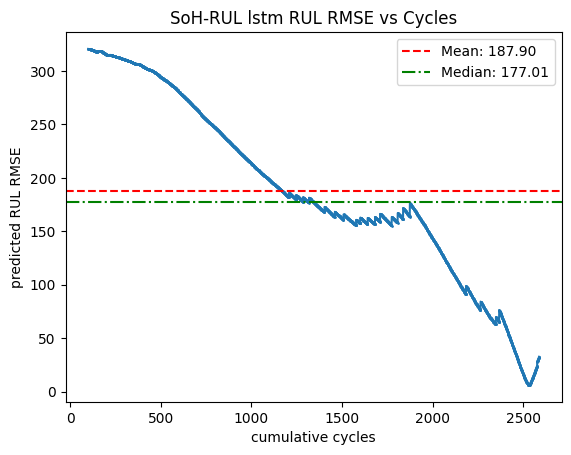

In [51]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

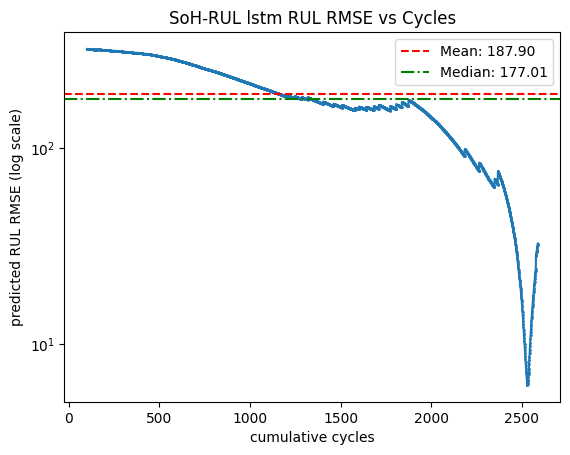

In [52]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

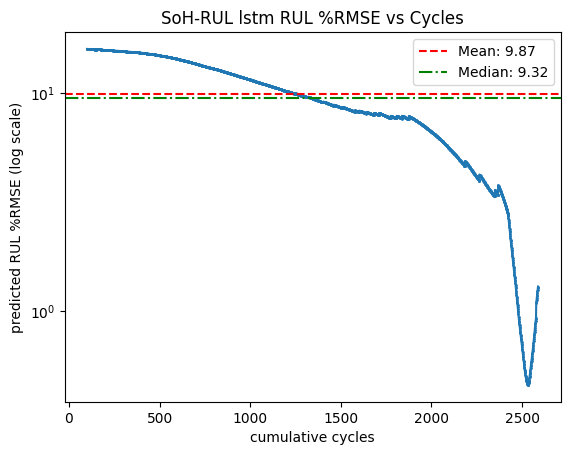

In [53]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE (log scale)')
plt.title('SoH-RUL lstm RUL %RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

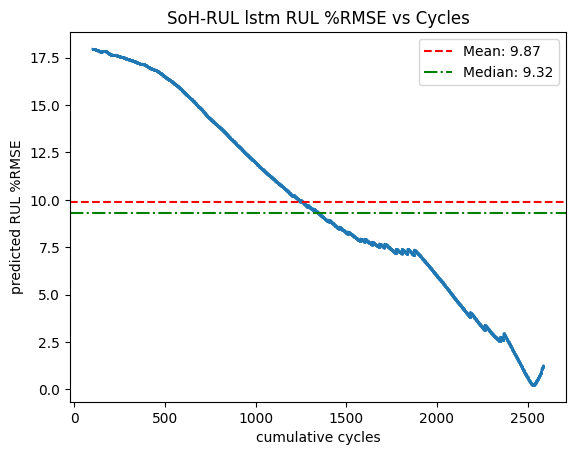

In [54]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE')
plt.title('SoH-RUL lstm RUL %RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [55]:
#save SoH to RUL rmse results
with open('SOH_to_RUL_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

## 2b. LSTMs that predict SoH from SoH

In [56]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor

def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        SoH = df[model_columns]
        X, y = df_to_X_y_tensor(SoH, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,i=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list = get_x_y_lists(paths)

    if INPUT_SIZE == 1:
        # Concatenate all X and y
        X_1,y_1 = torch.cat(X_list, dim=0).squeeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
    else:
        X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
    
    #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
    
    #DataLoader
    #print("load : ")
    loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
    #print(f"{data_type}loader lengths : ",loader.__len__())
    return loader,X_1,y_1

In [57]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')

gompertz-parameters-per-cycle/4-5-hust_gompertz_params.csv
gompertz-parameters-per-cycle/6-6-hust_gompertz_params.csv
gompertz-parameters-per-cycle/6-1-hust_gompertz_params.csv
gompertz-parameters-per-cycle/6-2-hust_gompertz_params.csv
gompertz-parameters-per-cycle/5-3-hust_gompertz_params.csv
gompertz-parameters-per-cycle/10-4-hust_gompertz_params.csv
gompertz-parameters-per-cycle/1-2-hust_gompertz_params.csv
gompertz-parameters-per-cycle/8-6-hust_gompertz_params.csv
gompertz-parameters-per-cycle/10-7-hust_gompertz_params.csv
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
gompertz-parameters-per-cycle/7-5-hust_gompertz_params.csv
gompertz-parameters-per-cycle/10-1-hust_gompertz_params.csv
gompertz-parameters-per-cycle/10-6-hust_gompertz_params.csv
gompertz-parameters-per-cycle/1-1-hust_gompertz_params.csv
gompertz-parameters-per-cycle/9-4-hust_gompertz_params.csv
gompertz-parameters-per-cycle/7-6-hust_gompertz_params.csv
gompertz-parameters-per-cycle/8-8-hust_gompertz_para

In [58]:
## NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML)
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: [32, 10, 5]
        
        # Run LSTM
        # lstm_out shape: [32, 10, 64]
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        # last_time_step shape: [32, 64]
        
        # Project to 5 output features
        prediction = self.fc(last_time_step)
        # prediction shape: [32, 5]
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
# model.load_state_dict(torch.load(f"/kaggle/input/gi-lstm-models/pytorch/default/{version}/SoH-to-SoH-best_lstm_model-window-100.pth",map_location=torch.device(device)))
model.load_state_dict(torch.load(f"models/SoH-to-SoH-best_lstm_model-window-100.pth",map_location=torch.device(device)))
#generate test_loader
test_rmse = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_pred = model(X_test)
    #print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

print('\n Test RMSE for SoH to SoH prediction : ',test_rmse/len(test_loader))


 Test RMSE for SoH to SoH prediction :  0.0003580824995879084


In [59]:
# X_test[0],y_test[0],y_pred[0]

In [60]:
# for i in range(100, 3000):
#     for X_test, y_test in test_loader:
#         X_test = X_test.to(device)
#         y_pred = model(X_test)
#         X_test = torch.cat((X_test[0][1:], y_pred[0].detach().view(1, 1)), dim=0)

all_step_predictions = []
current_window = X_test.clone() # Start with the initial X from loader

# Number of steps you want to forecast into the future
forecast_steps = 3000 

for _ in range(forecast_steps):
    # 1. Get prediction for current window
    # y_pred shape: [Batch, 1] (Next Capacity)
    y_pred = model(current_window)
    
    # Store for evaluation
    all_step_predictions.append(y_pred.detach())

    # 2. UPDATE ALL BATCHES AT ONCE
    # Assuming the value you append is the 1st column of your prediction
    # or the only column if predicting capacity directly.
    next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
    
    # Drop index 0, append new value to end
    current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)

# Now current_window is updated for the next iteration

In [61]:
all_step_predictions[-1]

tensor([[0.6778],
        [0.6778],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6778],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6778],
        [0.6778],
        [0.6778],
        [0.6780],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6778]], device='cuda:0')

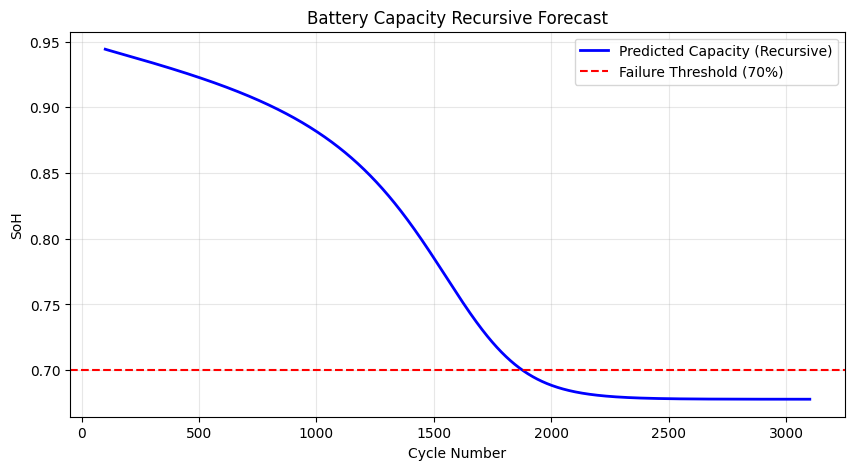

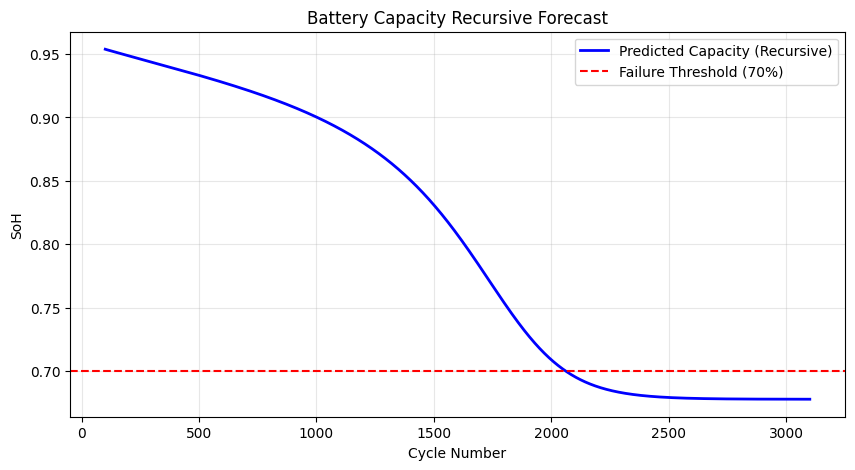

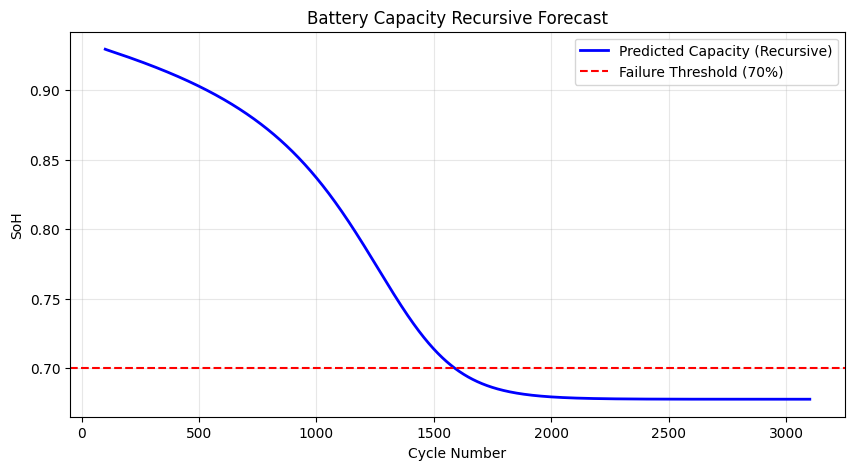

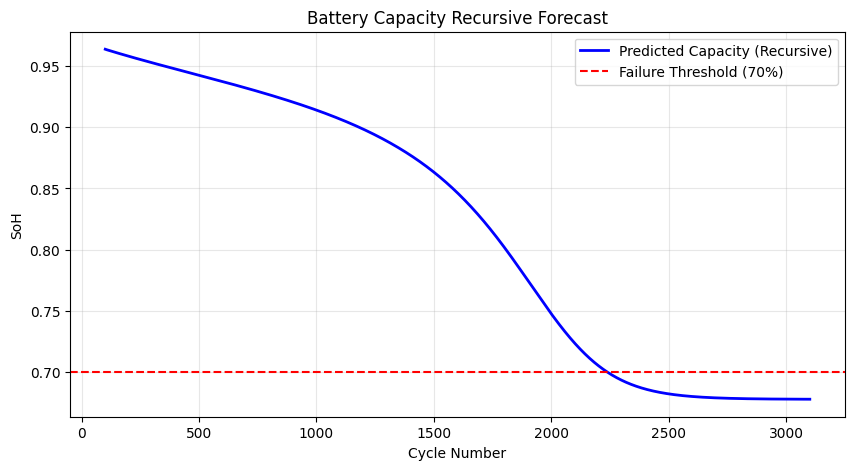

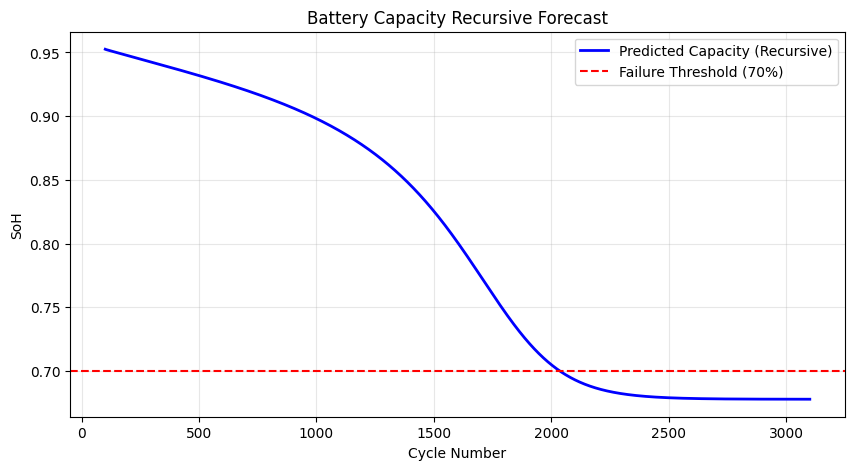

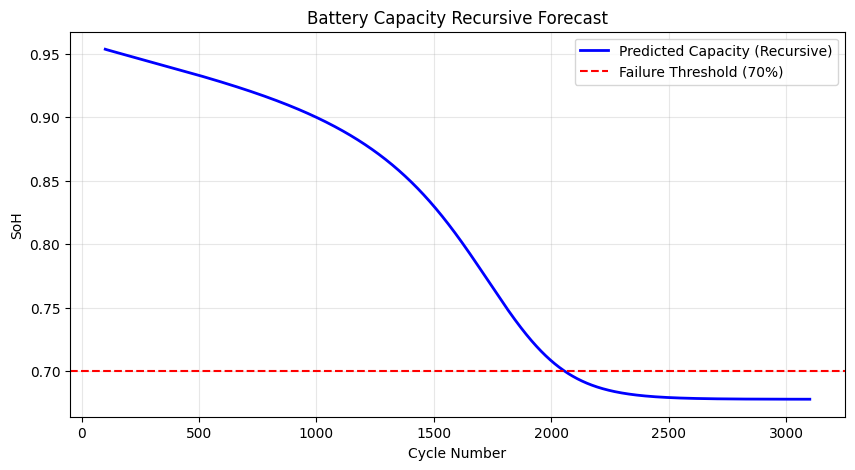

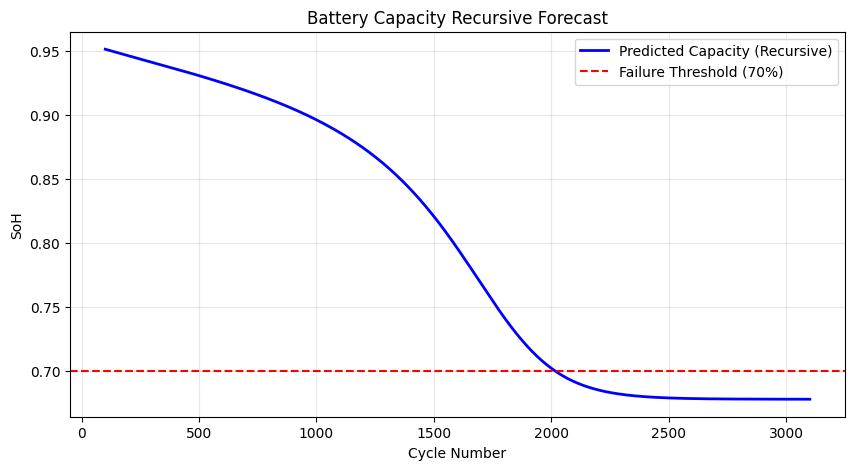

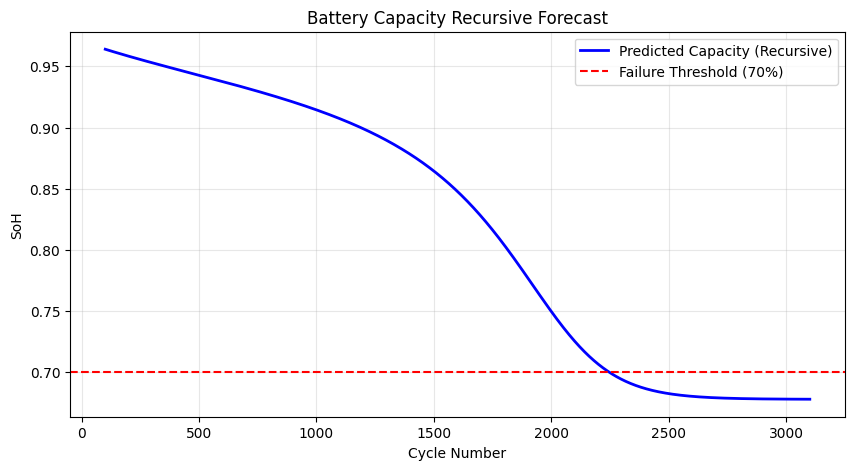

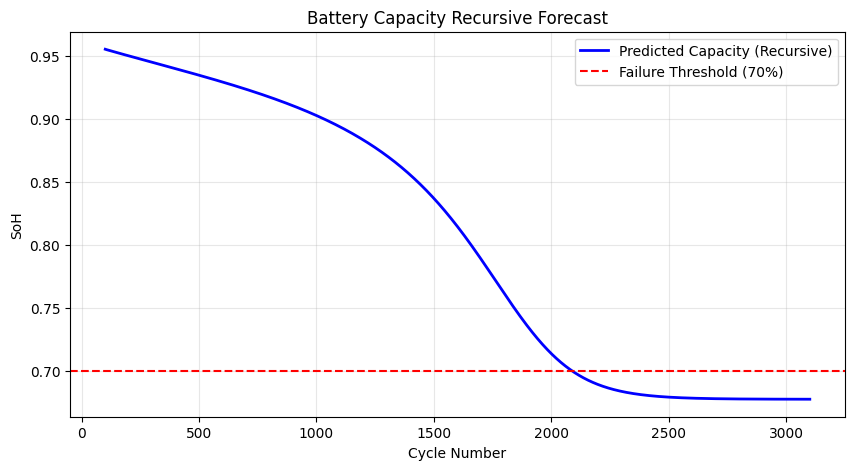

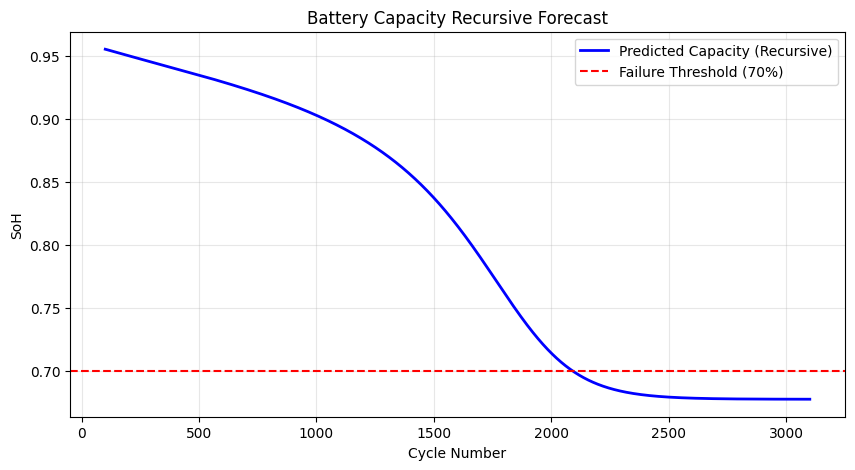

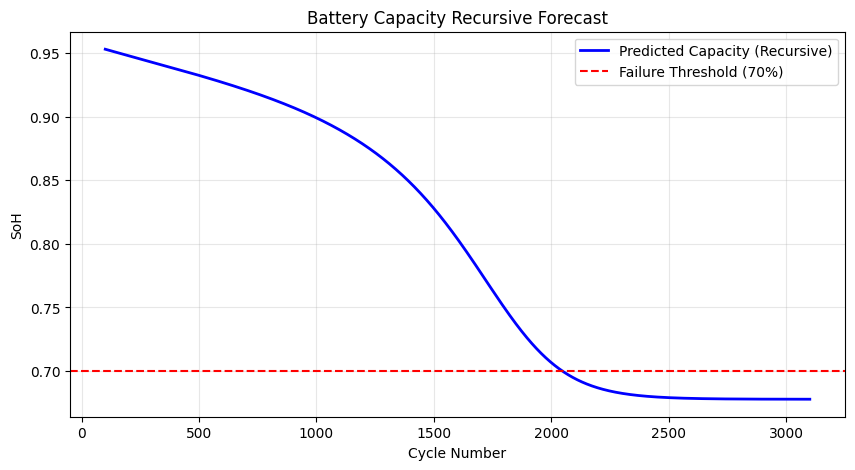

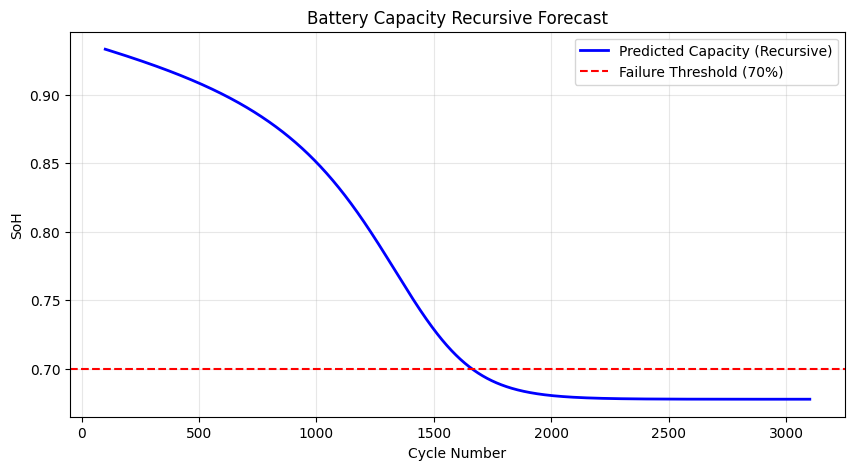

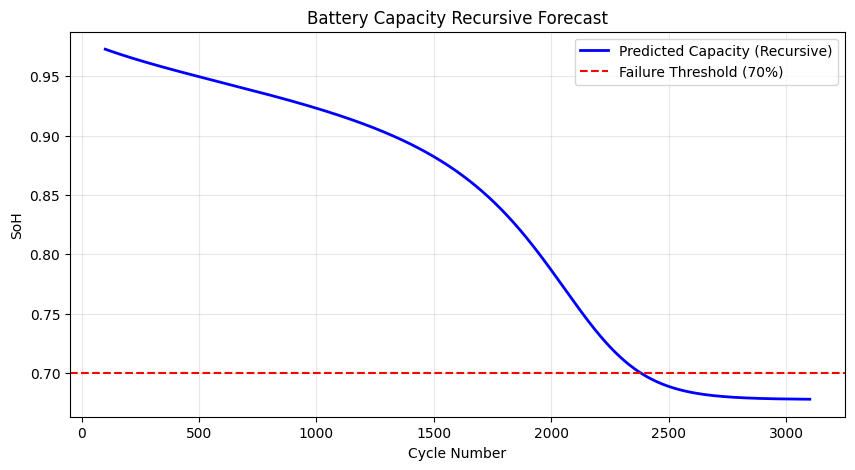

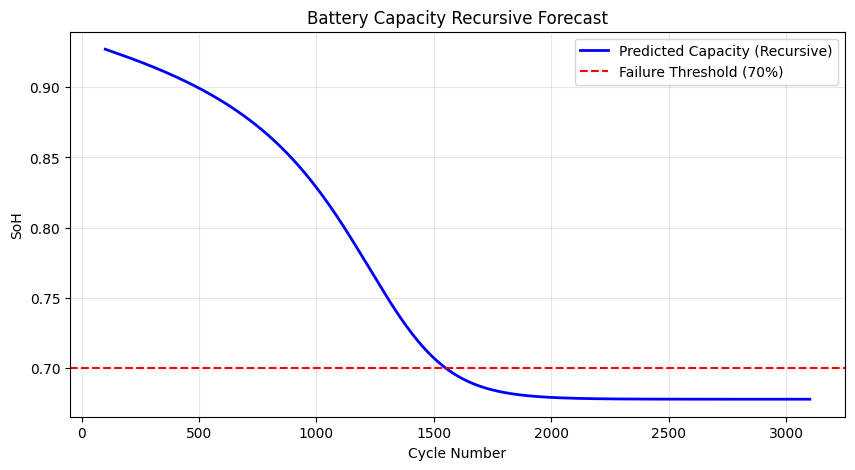

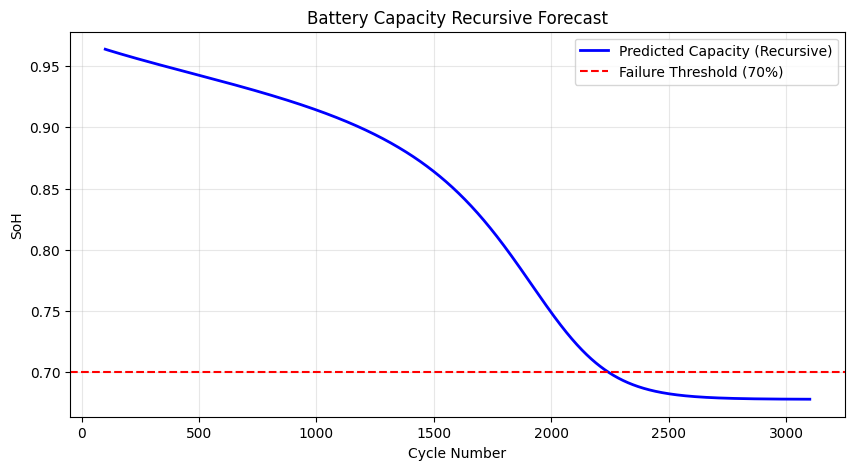

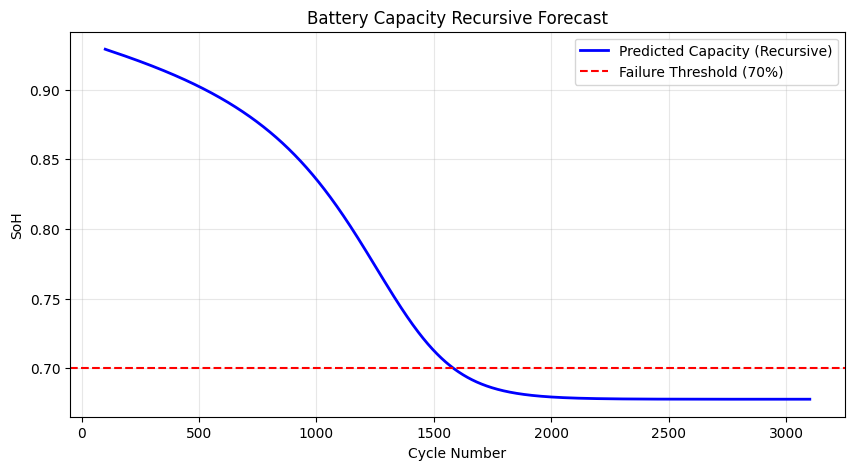

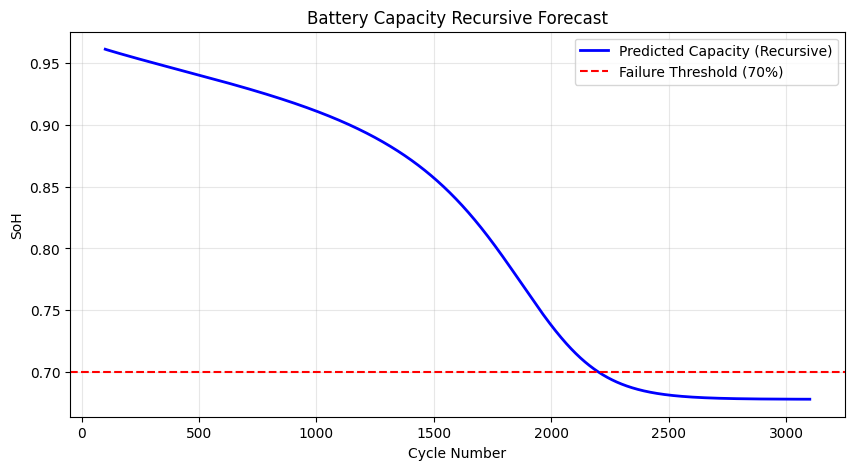

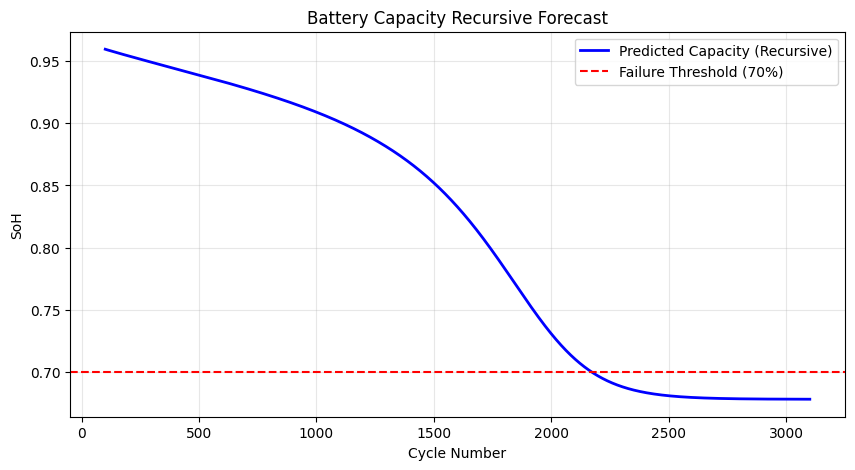

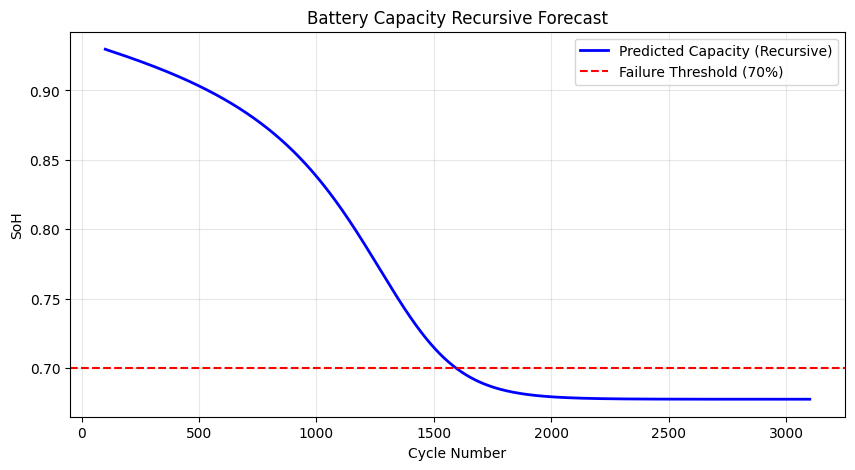

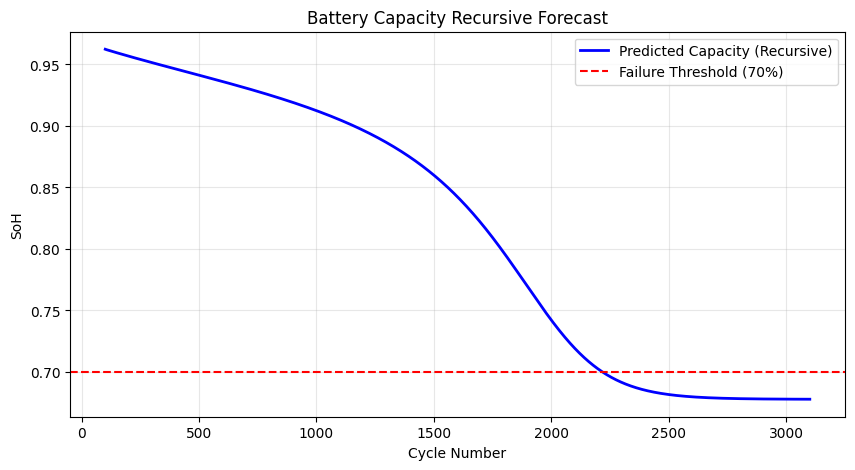

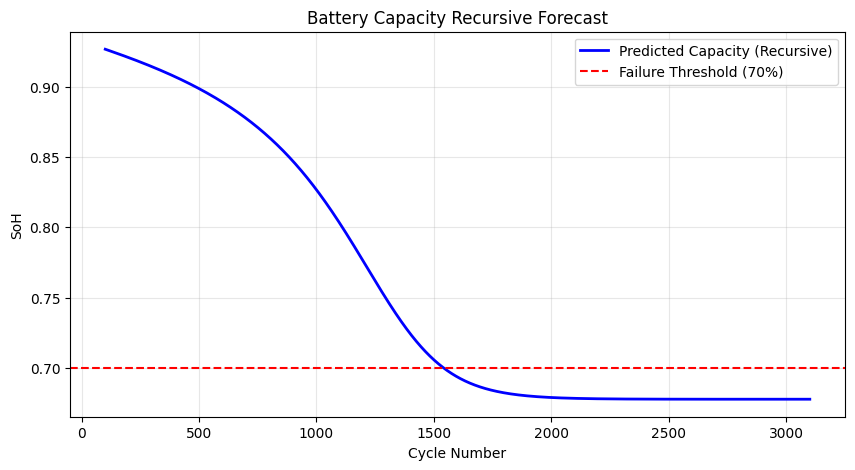

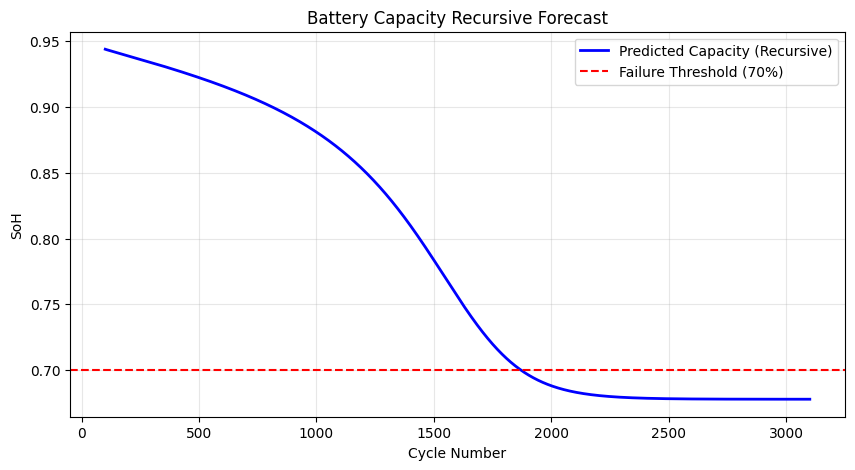

In [62]:
# 1. Stack the list into a single tensor: [Steps, Batch, 4]
all_preds_tensor = torch.stack(all_step_predictions) 
for i in range(0,len(all_step_predictions[-1])):
    # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
    # Shape will be [Steps]
    first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
    
    # 3. Create a time/cycle axis for the forecast
    start_cycle = 101 # Assuming your window was 100
    cycles = range(start_cycle, start_cycle + len(first_battery_forecast))
    
    # 4. Plot
    plt.figure(figsize=(10, 5))
    plt.plot(cycles, first_battery_forecast, label='Predicted Capacity (Recursive)', color='blue', linewidth=2)
    plt.axhline(y=0.7, color='red', linestyle='--', label='Failure Threshold (70%)')
    
    plt.title('Battery Capacity Recursive Forecast')
    plt.xlabel('Cycle Number')
    plt.ylabel('SoH')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [63]:
# 1. Stack into a single tensor: [Steps, Batch, Features]
# We want to analyze feature 0 (Capacity)
all_preds_tensor = torch.stack(all_step_predictions) 
capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]

# 2. Create a boolean mask where Capacity <= 0.7
# Shape: [Steps, Batch]
is_failed = capacity_forecasts <= 0.7

# 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
# torch.argmax returns the index of the first 'True' it finds.
# If a cell never hits 0.7, it returns 0 (we will handle this below).
steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)

# 4. Handle cells that never reached the threshold
# argmax returns 0 if no True is found. We check if the value at that 
# index is actually <= 0.7 to verify it really failed.
never_failed = ~is_failed.any(dim=0)
steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure

# 5. Convert to list or print results
failure_steps_list = steps_to_failure.tolist()

for i, steps in enumerate(failure_steps_list):
    status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
    print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")

Cell 0: 1876 steps to reach 0.7 (REACHED EoL)
Cell 1: 2061 steps to reach 0.7 (REACHED EoL)
Cell 2: 1589 steps to reach 0.7 (REACHED EoL)
Cell 3: 2238 steps to reach 0.7 (REACHED EoL)
Cell 4: 2035 steps to reach 0.7 (REACHED EoL)
Cell 5: 2055 steps to reach 0.7 (REACHED EoL)
Cell 6: 2015 steps to reach 0.7 (REACHED EoL)
Cell 7: 2246 steps to reach 0.7 (REACHED EoL)
Cell 8: 2090 steps to reach 0.7 (REACHED EoL)
Cell 9: 2092 steps to reach 0.7 (REACHED EoL)
Cell 10: 2046 steps to reach 0.7 (REACHED EoL)
Cell 11: 1661 steps to reach 0.7 (REACHED EoL)
Cell 12: 2381 steps to reach 0.7 (REACHED EoL)
Cell 13: 1550 steps to reach 0.7 (REACHED EoL)
Cell 14: 2242 steps to reach 0.7 (REACHED EoL)
Cell 15: 1583 steps to reach 0.7 (REACHED EoL)
Cell 16: 2199 steps to reach 0.7 (REACHED EoL)
Cell 17: 2169 steps to reach 0.7 (REACHED EoL)
Cell 18: 1595 steps to reach 0.7 (REACHED EoL)
Cell 19: 2217 steps to reach 0.7 (REACHED EoL)
Cell 20: 1541 steps to reach 0.7 (REACHED EoL)
Cell 21: 1870 steps to 

In [64]:
'''
        [[0.1208],
        [0.1642],
        [0.2578],
        [0.1509],
        [0.1808],
        [0.1248],
        [0.2589],
        [0.1286],
        [0.1875],
        [0.1775],
        [0.1404]]
'''
print()

# RMSE per cycle

In [65]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    if len(df) > window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[:1])
        # X.append(list(df['SoH'])[I:window_size+I])
        # y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor
    
def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1

In [66]:
def forecast_RUL(loader,X_test,y_test,model):
    ## A function to handle the model's recursive nature and compute RUL
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
    
    # Now current_window is updated for the next iteration
    
    # 1. Stack into a single tensor: [Steps, Batch, Features]
    # We want to analyze feature 0 (Capacity)
    all_preds_tensor = torch.stack(all_step_predictions) 
    capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]
    
    # 2. Create a boolean mask where Capacity <= 0.7
    # Shape: [Steps, Batch]
    is_failed = capacity_forecasts <= 0.7
    
    # 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
    # torch.argmax returns the index of the first 'True' it finds.
    # If a cell never hits 0.7, it returns 0 (we will handle this below).
    steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)
    
    # 4. Handle cells that never reached the threshold
    # argmax returns 0 if no True is found. We check if the value at that 
    # index is actually <= 0.7 to verify it really failed.
    never_failed = ~is_failed.any(dim=0)
    steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure
    
    # 5. Convert to list or print results
    failure_steps_list = steps_to_failure.tolist()
    RUL_steps = []
    for i, steps in enumerate(failure_steps_list):
        status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
        #print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")
        RUL_steps.append(steps+WINDOW_SIZE+I)
    return RUL_steps

In [67]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    break
    # y_pred = model(X_test)
    # #print(y_pred,'\n',y_test)
    # #inference for test results
    # test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())
y_preds = forecast_RUL(test_loader,X_test,y_test,model)
test_rmse = root_mean_squared_error(y_test*10000, y_preds)/len(test_loader)
print('RMSE for 100th cycle : ', test_rmse)
print('% RMSE for 100th cycle : ', test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100,'%')

RMSE for 100th cycle :  342.53520236184306
% RMSE for 100th cycle :  18.165933243422334 %


In [68]:
y_test*10000

tensor([[1561.0000],
        [2468.0000],
        [1609.0000],
        [1908.0000],
        [2689.0000],
        [1811.0000],
        [2678.0000],
        [2365.0000],
        [1782.9999],
        [2450.0000],
        [1875.0000],
        [1702.0000],
        [2285.0000],
        [1504.0000],
        [1975.0000],
        [1419.0000],
        [1679.0000],
        [1938.0000],
        [1307.9999],
        [1742.0000],
        [1348.0000],
        [1386.0001]])

In [ ]:
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in range(WINDOW_SIZE,MAX_WINDOW):
    test_rmse = 0
    test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
    if len(test_loader) > 0:  
        for X_test, y_test in test_loader:
            X_test = X_test.to(device)
            break
        y_preds = forecast_RUL(test_loader,X_test,y_test,model)
        test_rmse = root_mean_squared_error(y_test*10000, y_preds)/len(test_loader)#multiply by 10,000 because cycle numers had been normalized using 10000
        print(f'RMSE for cycle {I} is {test_rmse}')
    
    
        cycle_rmse[I] = test_rmse
        cycle_nrmse[I] = test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100

RMSE for cycle 100 is 326.90059900725987
RMSE for cycle 101 is 326.76187021165856
RMSE for cycle 102 is 326.6983621218868
RMSE for cycle 103 is 326.6523753893131
RMSE for cycle 104 is 326.75540168342883
RMSE for cycle 105 is 326.3608596324317
RMSE for cycle 106 is 325.95433557760504
RMSE for cycle 107 is 326.0493573483814
RMSE for cycle 108 is 326.2845269195343
RMSE for cycle 109 is 326.01791887454976
RMSE for cycle 110 is 326.3616256547632
RMSE for cycle 111 is 326.25554933469215
RMSE for cycle 112 is 326.0665044313171
RMSE for cycle 113 is 325.653680876802
RMSE for cycle 114 is 325.8537762802066
RMSE for cycle 115 is 326.00627694414106
RMSE for cycle 116 is 325.9043388537809
RMSE for cycle 117 is 325.85231166128864
RMSE for cycle 118 is 325.64956339477345
RMSE for cycle 119 is 325.34192080660074
RMSE for cycle 120 is 325.29825755053463
RMSE for cycle 121 is 324.98895369530976
RMSE for cycle 122 is 324.8608121899277
RMSE for cycle 123 is 324.43986979852104
RMSE for cycle 124 is 324.08

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
model

In [ ]:
#save SoH to SoH RUL rmse results
with open('SOH_to_SoH_RUL_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

# 3. GILSTM

## 3a. LSTMs that predict k,a and b from SoH, then use the inverse gompertz eqn to calculate RUL

In [ ]:
model_columns = ['SoH']

print("# B: Setup variables and functions")
# # Set variables
# WINDOW_SIZE = 35
model_type = ['lstm','seq2seq-lstm','pinn'][2]

cutoff_soh = 0.70
# Set Computing Environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = len(model_columns)
OUTPUT_SIZE =3 #RUL #len(model_columns)#1 #controls how many values the lstm outputs
num_epochs = 1000 #60
batch_size = 4 #32 #because the data is little a small batch size is better when training
normalize_soh = False
I = 0
if normalize_soh:
    soh_normalization_constant = 115.0 #115.0 may be better as it allows bounding between 0 and 1
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer
else:
    soh_normalization_constant = 1.0
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer

class PhysicsInformedLSTM(nn.Module):
    def __init__(self, input_size=5, hidden_size=128):
        super().__init__()
        # Direct mapping: Input -> LSTM -> FC -> Output
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(128, 3) 
        
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor
    
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
        '''
        Converts a time series into (X, y) tensors for LSTM training.
        
        X shape: (num_samples, window_size, 1)
        y shape: (num_samples, 1)
        '''
        # if isinstance(df, (pd.DataFrame, pd.Series)):
        #     df_as_np = df.to_numpy()
        # else:
        #     df_as_np = df  # Assume already numpy
    
        X, y , y2 = [], [], []
        #for i in range(len(df_as_np) - window_size):
        #for i in range(len(df)-window_size):  
        if len(df) > window_size+I:
            X.append(list(df['SoH'])[I:window_size+I])
            #y.append([df_as_np[i + window_size:i + window_size+output_size]])
            y.append([list(df['k'])[-1],list(df['a'])[-1],list(df['b'])[-1]])
            #append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
            y2.append(list(df['rul'])[:1])
        X,y,y2 = np.array(X),np.array(y), np.array(y2)
        X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
        y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
        y_2_tensor = torch.tensor(y2, dtype=torch.float32)  #bug was here written y instead of y2
        return X_tensor, y_tensor, y_2_tensor
            
    
def get_x_y_lists(paths):
    X_list,y_list,y_target = [],[],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y , y1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        # print("X length : ",len(X))
        if len(X) > 0 :
            X_list.append(X)
            y_list.append(y)
            y_target.append(y1) #RUL
    #print("X_list length : ",len(X_list))
    return X_list,y_list, y_target

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list, y_target = get_x_y_lists(paths)
    if len(X_list) > 0:
        batch_size = torch.cat(X_list, dim=0).shape[0]
        
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1,y_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(batch_size,-1),torch.cat(y_target, dim=0).view(batch_size,-1)
        else:
            X_1,y_1,y_2 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(y_target, dim=0).view(-1,INPUT_SIZE)
        
        print(f" X_{data_type} shape : {X_1.shape} , y_{data_type} shape : {y_1.shape} ，y_2{data_type} shape: {y_2.shape}" )
        
        #DataLoader
        print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1, y_2), batch_size=32, shuffle=shuffle)
        print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1, y_2
    # --- HANDLE EMPTY DATA CASE ---
    print(f"Warning: No data found for {data_type}. Returning empty objects.")
    return [], None, None, None  # Returns an empty list for the loader and None for tensors

data_use = {0:["train"],1:["val"],2:["test"]}

test_loader,X_test,y_test,y_test_target = give_paths_get_loaders(test_paths,data_use[2])
model = PhysicsInformedLSTM(input_size=INPUT_SIZE).to(device)

def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

In [ ]:
model.load_state_dict(torch.load(f"models/SoH-to-kab-best_lstm_model-window-100_model_pinn_data_all.pth",map_location=torch.device(device)))

cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,MAX_WINDOW-101)):
    test_rmse = 0
    test_loader,X_test,y_test,y_target = give_paths_get_loaders(test_paths,'test')
    if X_test != None:
        for X_test, y_test, y_target in test_loader:
            X_test = X_test.to(device)
            y_pred = model(X_test)
            
            k_pred = y_pred[:, 0].cpu().detach().numpy()
            a_pred = y_pred[:, 1].cpu().detach().numpy()
            b_pred = y_pred[:, 2].cpu().detach().numpy()
            results = np.round(inverse_gompertz_func(y=0.7, k=k_pred, a=a_pred, b=b_pred), decimals=4)
            #print(results,'\n',y_target)
            #inference for test results
            test_rmse += root_mean_squared_error(results,y_target)
        
        print(f'\n Test RMSE for cycle {I} SoH to k,a,b then RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numers had been normalized using 10000
        if len(test_loader) > 0:
            cycle_rmse[I] = test_rmse/len(test_loader)*10000
            cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/(np.mean(y_target.cpu().detach().numpy())*10000)*100
        #break
        

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
#save SoH to RUL rmse results
with open('GILSTM_1_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

## 3b. GILSTM cycle_to_cycle that predict k,a and b from SoH, then use the inverse gompertz eqn to calculate RUL

In [ ]:
model_columns = ['SoH']

print("# B: Setup variables and functions")
# # Set variables
# WINDOW_SIZE = 35
model_type = ['lstm','seq2seq-lstm','pinn'][2]

cutoff_soh = 0.70
# Set Computing Environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = len(model_columns)
OUTPUT_SIZE =3 #RUL #len(model_columns)#1 #controls how many values the lstm outputs
num_epochs = 1000 #60
batch_size = 4 #32 #because the data is little a small batch size is better when training
normalize_soh = False
I = 0
if normalize_soh:
    soh_normalization_constant = 115.0 #115.0 may be better as it allows bounding between 0 and 1
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer
else:
    soh_normalization_constant = 1.0
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer

class PhysicsInformedLSTM(nn.Module):
    def __init__(self, input_size=5, hidden_size=128):
        super().__init__()
        # Direct mapping: Input -> LSTM -> FC -> Output
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(128, 3) 
        
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor
    
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
        '''
        Converts a time series into (X, y) tensors for LSTM training.
        
        X shape: (num_samples, window_size, 1)
        y shape: (num_samples, 1)
        '''
        # if isinstance(df, (pd.DataFrame, pd.Series)):
        #     df_as_np = df.to_numpy()
        # else:
        #     df_as_np = df  # Assume already numpy
    
        X, y , y2 = [], [], []
        #for i in range(len(df_as_np) - window_size):
        #for i in range(len(df)-window_size):  
        if len(df) > window_size+I:
            X.append(list(df['SoH'])[I:window_size+I])
            #y.append([df_as_np[i + window_size:i + window_size+output_size]])
            y.append([list(df['k'])[-1],list(df['a'])[-1],list(df['b'])[-1]])
            #append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
            y2.append(list(df['rul'])[:1])
        X,y,y2 = np.array(X),np.array(y), np.array(y2)
        X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
        y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
        y_2_tensor = torch.tensor(y2, dtype=torch.float32)  #bug was here written y instead of y2
        return X_tensor, y_tensor, y_2_tensor
            
    
# def get_x_y_lists(paths):
#     X_list,y_list,y_target = [],[],[]
#     for path in paths:
#         print(path)
#         df = pd.read_csv(path)
#         df['Cycle number'] = df['Cycle number']/10000
#         df['rul'] = df['rul']/10000
#         #normalize SoH
#         df['SoH'] =  df['SoH']/soh_normalization_constant
#         df.index = df['Cycle number']
#         #SoH = df[model_columns]
#         X, y , y1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
#         X_list.append(X)
#         y_list.append(y)
#         y_target.append(y1) #RUL
#     return X_list,y_list, y_target

# def give_paths_get_loaders(paths,data_type,shuffle=False):
#     X_list, y_list, y_target = get_x_y_lists(paths)

#     batch_size = torch.cat(X_list, dim=0).shape[0]
    
#     if INPUT_SIZE == 1:
#         # Concatenate all X and y
#         X_1,y_1,y_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(batch_size,-1),torch.cat(y_target, dim=0).view(batch_size,-1)
#     else:
#         X_1,y_1,y_2 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(y_target, dim=0).view(-1,INPUT_SIZE)
    
#     print(f" X_{data_type} shape : {X_1.shape} , y_{data_type} shape : {y_1.shape} ，y_2{data_type} shape: {y_2.shape}" )
    
#     #DataLoader
#     print("load : ")
#     loader = DataLoader(TensorDataset(X_1, y_1, y_2), batch_size=32, shuffle=shuffle)
#     print(f"{data_type}loader lengths : ",loader.__len__())
#     return loader,X_1,y_1, y_2

def get_x_y_lists(paths):
    X_list,y_list,y_target = [],[],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y , y1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        # print("X length : ",len(X))
        if len(X) > 0 :
            X_list.append(X)
            y_list.append(y)
            y_target.append(y1) #RUL
    #print("X_list length : ",len(X_list))
    return X_list,y_list, y_target

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list, y_target = get_x_y_lists(paths)
    if len(X_list) > 0:
        batch_size = torch.cat(X_list, dim=0).shape[0]
        
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1,y_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(batch_size,-1),torch.cat(y_target, dim=0).view(batch_size,-1)
        else:
            X_1,y_1,y_2 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(y_target, dim=0).view(-1,INPUT_SIZE)
        
        print(f" X_{data_type} shape : {X_1.shape} , y_{data_type} shape : {y_1.shape} ，y_2{data_type} shape: {y_2.shape}" )
        
        #DataLoader
        print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1, y_2), batch_size=32, shuffle=shuffle)
        print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1, y_2
    # --- HANDLE EMPTY DATA CASE ---
    print(f"Warning: No data found for {data_type}. Returning empty objects.")
    return [], None, None, None  # Returns an empty list for the loader and None for tensors

data_use = {0:["train"],1:["val"],2:["test"]}

test_loader,X_test,y_test,y_test_target = give_paths_get_loaders(test_paths,data_use[2])
model = PhysicsInformedLSTM(input_size=INPUT_SIZE).to(device)

def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

In [ ]:
model.load_state_dict(torch.load(f"models/best_lstm_model-window-100_model_pinn_data_all_cycle_to_cycle.pth",map_location=torch.device(device)))

cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,MAX_WINDOW-101)):
    test_rmse = 0
    test_loader,X_test,y_test,y_target = give_paths_get_loaders(test_paths,'test')
    if X_test != None:
        for X_test, y_test, y_target in test_loader:
            X_test = X_test.to(device)
            y_pred = model(X_test)
            
            k_pred = y_pred[:, 0].cpu().detach().numpy()
            a_pred = y_pred[:, 1].cpu().detach().numpy()
            b_pred = y_pred[:, 2].cpu().detach().numpy()
            results = np.round(inverse_gompertz_func(y=0.7, k=k_pred, a=a_pred, b=b_pred), decimals=4)
            #print(results,'\n',y_target)
            #inference for test results
            test_rmse += root_mean_squared_error(results,y_target)
        
        print(f'\n Test RMSE for cycle {I} SoH to k,a,b then RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numers had been normalized using 10000
        if len(test_loader) > 0:
            cycle_rmse[I] = test_rmse/len(test_loader)*10000
            cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/(np.mean(y_target.cpu().detach().numpy())*10000)*100
        #break
    

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
cycle_rmse[100],cycle_nrmse[100]

In [ ]:
#save SoH to RUL rmse results
with open('GILSTM_2_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [ ]:
## Use NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML) or 500, 1000 to improve the accuracy and the output is k,a and b. Here usage of dy/dx may be crucial.


## 3c. LSTMs that predict SoH from SoH then pass the predicted curve through a gompertz fitting model and calculate rul using the inverse gompertz eqn 

In [ ]:
## use models from 2b to accomplish this.

In [ ]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y, X1 = [], [],[]
    
    if len(df) > window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[:1])
        X1.append(list(df['SoH'])[:window_size+I])
        # X.append(list(df['SoH'])[I:window_size+I])
        # y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y,X1 = np.array(X),np.array(y),np.array(X1)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    X1_tensor = torch.tensor(X1, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor,X1_tensor

def get_x_y_lists(paths):
    X_list,y_list,X1_list = [],[],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y, X1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
        X1_list.append(X1)
    return X_list,y_list,X1_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list, X1_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1,X_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(X1_list, dim=0).unsqueeze(-1)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1,X_2), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1,X_2

def forecast_RUL(loader,X_test,y_test,model):
    ## A function to handle the model's recursive nature and compute RUL
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
    
    # Now current_window is updated for the next iteration
    
    # 1. Stack into a single tensor: [Steps, Batch, Features]
    # We want to analyze feature 0 (Capacity)
    all_preds_tensor = torch.stack(all_step_predictions) 
    capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]
    
    # 2. Create a boolean mask where Capacity <= 0.7
    # Shape: [Steps, Batch]
    is_failed = capacity_forecasts <= 0.7
    
    # 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
    # torch.argmax returns the index of the first 'True' it finds.
    # If a cell never hits 0.7, it returns 0 (we will handle this below).
    steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)
    
    # 4. Handle cells that never reached the threshold
    # argmax returns 0 if no True is found. We check if the value at that 
    # index is actually <= 0.7 to verify it really failed.
    never_failed = ~is_failed.any(dim=0)
    steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure
    
    # 5. Convert to list or print results
    failure_steps_list = steps_to_failure.tolist()
    RUL_steps = []
    for i, steps in enumerate(failure_steps_list):
        status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
        #print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")
        RUL_steps.append(steps+WINDOW_SIZE+I)
    return RUL_steps

In [ ]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test,X1_test = give_paths_get_loaders(test_paths,'test')

In [ ]:
## NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML)
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: [32, 10, 5]
        
        # Run LSTM
        # lstm_out shape: [32, 10, 64]
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        # last_time_step shape: [32, 64]
        
        # Project to 5 output features
        prediction = self.fc(last_time_step)
        # prediction shape: [32, 5]
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
model.load_state_dict(torch.load(f"models/SoH-to-SoH-best_lstm_model-window-100.pth",map_location=torch.device(device)))
#generate test_loader
test_rmse = 0
for X_test, y_test,X1_test in test_loader:
    X_test = X_test.to(device)
    X1_test = X1_test.to(device)
    y_pred = model(X_test)
    #print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

#print('\n Test RMSE for SoH to SoH prediction : ',test_rmse/len(test_loader))

In [ ]:
RUL_steps = forecast_RUL(test_loader,X_test,y_test,model)

In [ ]:
all_step_predictions = []
current_window = X_test.clone() # Start with the initial X from loader

# Number of steps you want to forecast into the future
forecast_steps = 3000 

for _ in range(forecast_steps):
    # 1. Get prediction for current window
    # y_pred shape: [Batch, 1] (Next Capacity)
    y_pred = model(current_window)
    
    # Store for evaluation
    all_step_predictions.append(y_pred.detach())

    # 2. UPDATE ALL BATCHES AT ONCE
    # Assuming the value you append is the 1st column of your prediction
    # or the only column if predicting capacity directly.
    next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
    
    # Drop index 0, append new value to end
    current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)

# Now current_window is updated for the next iteration

In [ ]:
# 1. Stack the list into a single tensor: [Steps, Batch, 4]
from scipy.optimize import minimize


# Define the loss function
def loss_function(params, x, d):
    k , a, b = params  # Parameters to optimize
    predicted_d = gompertz_func(x,k,a,b) # Equation model
    return np.sum((predicted_d - d) ** 2)
                  
#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))

all_preds_tensor = torch.stack(all_step_predictions) 

for i in range(0,len(all_step_predictions[-1])):
    # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
    # Shape will be [Steps]
    first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
    
    # 3. Create a time/cycle axis for the forecast
    start_cycle = 101 # Assuming your window was 100
    cycles = range(start_cycle, start_cycle + len(first_battery_forecast))

    
    
    x_data = np.concatenate((np.array(range(1,start_cycle)),np.array(cycles[:RUL_steps[i]])))/10000.0
    y_data = np.concatenate((X1_test[i,:,0].cpu().numpy(),np.array(first_battery_forecast[:RUL_steps[i]])))
    
    

    # Initial guess for a, b, c
    initial_guess = [1, 1, 1]
    
    # Perform optimization
    result = minimize(loss_function, initial_guess, args=(x_data, y_data))
    
    #popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
    # Predict
    x_future = np.linspace(0, 1, 3000)
    
    op_k, op_a, op_b = result.x
    #print(op_k, op_a, op_b,np.round(inverse_gompertz_func(y=0.7, k=op_k, a=op_a, b=op_b), decimals=4),RUL_steps[i],y_test[i,:].cpu().numpy())
    # y_pred = gompertz_func(x_future, op_k, op_a, op_b)
    # # Plot
    # plt.plot(x_data, y_data, label='Observed')
    # plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
    # # plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
    # # plt.legend()
    # plt.xlabel("Normalized Cycles")
    # plt.ylabel("SoH")
    # plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
    # plt.title("Gompertz Fit Real Time")
    # plt.grid(False)
    # plt.legend()
    # plt.show()

In [ ]:
x_data, y_data, x_future

In [ ]:
X1_test[i,:,0].shape

In [ ]:
#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))

def confirm_SoH_SoH_via_Gompertz(test_loader,X_test,y_test,model,I,X1_test):
    
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
        
    RUL_steps = forecast_RUL(test_loader,X_test,y_test,model)
    
    all_preds_tensor = torch.stack(all_step_predictions) 
    gompertz_predictions = []
    for i in range(0,len(all_step_predictions[-1])):
        # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
        # Shape will be [Steps]
        first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
        
        # 3. Create a time/cycle axis for the forecast
        start_cycle = 101+I # start cycle from 100
        cycles = range(start_cycle, start_cycle + len(first_battery_forecast))
    
        
        
        x_data = np.concatenate((np.array(range(1,start_cycle)),np.array(cycles[:RUL_steps[i]])))/10000.0
        y_data = np.concatenate((X1_test[i,:,0].cpu().numpy(),np.array(first_battery_forecast[:RUL_steps[i]])))
        
        
    
        # Initial guess for a, b, c
        initial_guess = [1, 1, 1]
        
        # Perform optimization
        result = minimize(loss_function, initial_guess, args=(x_data, y_data))
        
        #popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
        # Predict
        x_future = np.linspace(0, 1, 3000)
        
        op_k, op_a, op_b = result.x
        #print(op_k, op_a, op_b,np.round(inverse_gompertz_func(y=0.7, k=op_k, a=op_a, b=op_b), decimals=4),RUL_steps[i],y_test[i,:].cpu().numpy())
        gompertz_predictions.append(inverse_gompertz_func(y=0.7, k=op_k, a=op_a, b=op_b))
    return gompertz_predictions#,y_test[i,:].cpu().numpy()

In [ ]:
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in range(WINDOW_SIZE,MAX_WINDOW):
    I -= 100
    test_rmse = 0
    test_loader,X_test,y_test,X1_test = give_paths_get_loaders(test_paths,'test')
    if len(test_loader) > 0:  
        for X_test, y_test,X1_test in test_loader:
            X_test = X_test.to(device)
            X1_test = X1_test.to(device)
            break
        y_preds = confirm_SoH_SoH_via_Gompertz(test_loader,X_test,y_test,model,I,X1_test)#forecast_RUL(test_loader,X_test,y_test,model)
        test_rmse = 10000*(root_mean_squared_error(y_test, y_preds)/len(test_loader))#multiply by 10,000 because cycle numers had been normalized using 10000
        
        I += 100
        print(f'RMSE for cycle {I} is {test_rmse}') #,{y_test, y_preds}')
    
    
        cycle_rmse[I] = test_rmse
        cycle_nrmse[I] = test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100
    #break

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE')
plt.title('SoH-SoH GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [ ]:
cycle_rmse[100],cycle_nrmse[100]

In [ ]:
#save SoH to RUL rmse results
with open('GILSTM_3_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [ ]:
cycle_rmse

In [ ]:
file_list = ["gompertz_rmse_results.pkl","SOH_to_RUL_rmse_results.pkl","SOH_to_SoH_RUL_rmse_results.pkl","GILSTM_1_rmse_results.pkl","GILSTM_2_rmse_results.pkl","GILSTM_3_rmse_results.pkl"]
models_names_list = ["Gompertz","LSTM1","LSTM2","GILSTM1","GILSTM2","GILSTM3"]
# A list to store the contents of all files
all_contents = []

for file_path in file_list:
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            all_contents.append(data)
            print(f"Successfully loaded {file_path}")
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error loading {file_path}: {e}")

# Now all_contents contains the data from every file
cycle_rmses = {name : content[0] for name, content in zip(models_names_list, all_contents)}
cycle_nrmses = cycle_rmses = {name : content[1] for name, content in zip(models_names_list, all_contents)} #percentage of mean

In [ ]:
#cycle rmses

plt.figure(figsize=(10, 6))

# 2. Iterate and plot each one
for label, data_dict in cycle_rmses.items():
    # Sorting keys (cycles) to ensure the line is drawn correctly
    sorted_cycles = sorted(data_dict.keys())
    rmse_values = [data_dict[c] for c in sorted_cycles]
    
    plt.plot(sorted_cycles, rmse_values, linestyle='-', label=label)

# 3. Add formatting
plt.xlabel('Cycle')
plt.ylabel('RUL RMSE')
plt.yscale('log')
plt.title('RUL RMSE Progress over Cycles')
plt.legend(title="Model Comparison") # Displays the labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 4. Show or Save the plot
plt.show()
plt.savefig('rmse_comparison.png')

In [ ]:
#cycle nrmses

plt.figure(figsize=(10, 6))

# 2. Iterate and plot each one
for label, data_dict in cycle_nrmses.items():
    # Sorting keys (cycles) to ensure the line is drawn correctly
    sorted_cycles = sorted(data_dict.keys())
    rmse_values = [data_dict[c] for c in sorted_cycles]
    
    plt.plot(sorted_cycles, rmse_values, linestyle='-', label=label)

# 3. Add formatting
plt.xlabel('Cycle')
plt.ylabel('RUL RMSE')
plt.yscale('log')
plt.title('RUL %RMSE Progress over Cycles')
plt.legend(title="Model Comparison") # Displays the labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 4. Show or Save the plot
plt.show()
plt.savefig('nrmse_comparison.png')